In [ ]:
#!pip install ydata_profiling

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from ydata_profiling import ProfileReport

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Data upload


In [ ]:
fires_df = pd.read_csv('/content/drive/MyDrive/data_charcoal/fires.csv')
supplies_df = pd.read_csv('/content/drive/MyDrive/data_charcoal/supplies.csv')
temperature_df = pd.read_csv('/content/drive/MyDrive/data_charcoal/temperature.csv')
weather_15_df = pd.read_csv('/content/drive/MyDrive/data_charcoal/weather_data_2015.csv')
weather_16_df = pd.read_csv('/content/drive/MyDrive/data_charcoal/weather_data_2016.csv')
weather_17_df = pd.read_csv('/content/drive/MyDrive/data_charcoal/weather_data_2017.csv')
weather_18_df = pd.read_csv('/content/drive/MyDrive/data_charcoal/weather_data_2018.csv')
weather_19_df = pd.read_csv('/content/drive/MyDrive/data_charcoal/weather_data_2019.csv')
weather_20_df = pd.read_csv('/content/drive/MyDrive/data_charcoal/weather_data_2020.csv')
weather_21_df = pd.read_csv('/content/drive/MyDrive/data_charcoal/weather_data_2021.csv')

In [ ]:
def data_check(data):
  print('HEAD 5')
  display(data.head(5))
  #print('-'*120)
  #print('SAMPLE 5')
  #display(data.sample(5))
  print('-'*120)
  print('DF INFO')
  display(data.info())
  print('-'*120)
  print('DF % NAN CHECK')
  print(100 * data.isna().sum()/len(data))
  print('-'*120)
  print('DF DUP CHECK')
  print('Дубликатов найдено:',data.duplicated().sum())
  if data.duplicated().sum() != 0:
    display(data[data.duplicated()])

### Fires

In [ ]:
data_check(fires_df)

HEAD 5


,Дата составления,Груз,"Вес по акту, тн",Склад,Дата начала,Дата оконч.,Нач.форм.штабеля,Штабель
0,2019-03-19,A1,255.00,4,2019-03-19 09:00:00,2019-03-19 21:00:00,2018-11-23 00:00:00,6
1,2019-03-24,B2,42.50,3,2019-03-24 09:00:00,2019-03-24 21:00:00,2019-01-03 00:00:00,21
2,2019-03-25,B2,72.25,3,2018-03-24 21:00:00,2019-03-25 09:00:00,2019-01-03 00:00:00,21
3,2019-06-11,A1,127.50,4,2019-06-11 09:00:00,2019-06-11 21:00:00,2019-04-28 23:55:00,15
4,2019-07-07,A1,127.50,4,2019-07-06 21:00:00,2019-07-07 09:00:00,2019-05-19 00:00:00,22


------------------------------------------------------------------------------------------------------------------------
DF INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Дата составления  486 non-null    object 
 1   Груз              486 non-null    object 
 2   Вес по акту, тн   486 non-null    float64
 3   Склад             486 non-null    int64  
 4   Дата начала       486 non-null    object 
 5   Дата оконч.       486 non-null    object 
 6   Нач.форм.штабеля  486 non-null    object 
 7   Штабель           486 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 30.5+ KB


None

------------------------------------------------------------------------------------------------------------------------
DF % NAN CHECK
Дата составления    0.0
Груз                0.0
Вес по акту, тн     0.0
Склад               0.0
Дата начала         0.0
Дата оконч.         0.0
Нач.форм.штабеля    0.0
Штабель             0.0
dtype: float64
------------------------------------------------------------------------------------------------------------------------
DF DUP CHECK
Дубликатов найдено: 1


,Дата составления,Груз,"Вес по акту, тн",Склад,Дата начала,Дата оконч.,Нач.форм.штабеля,Штабель
209,2020-06-16,A1,51.0,6,2020-06-16 09:01:00,2020-06-16 20:59:00,2020-03-15 00:00:00,1


In [ ]:
fires_columns = ['compilation_date', 'coal_name', 'act_weight', 'depot', 'start_date', 'end_date', 'stack_formation_date', 'stack']
fires_df.columns = fires_columns

In [ ]:
fires_df['compilation_date'] = pd.to_datetime(fires_df['compilation_date'], format='%Y-%m-%d')
fires_df['start_date'] = pd.to_datetime(fires_df['start_date'], format='%Y-%m-%d %H:%M:%S')
fires_df['end_date'] = pd.to_datetime(fires_df['end_date'], format='%Y-%m-%d %H:%M:%S')
fires_df['stack_formation_date'] = pd.to_datetime(fires_df['stack_formation_date'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
fires_df = fires_df.drop_duplicates()

### Supplies

In [ ]:
data_check(supplies_df)


HEAD 5


,ВыгрузкаНаСклад,Наим. ЕТСНГ,Штабель,ПогрузкаНаСудно,"На склад, тн","На судно, тн",Склад
0,2019-01-02,E5,1,2019-02-08,11984.1925,11984.1925,3
1,2019-01-02,A1,34,2019-02-12,3913.8250,3913.8250,3
2,2019-01-02,A1,37,2019-02-23,11626.9120,11626.9120,3
3,2019-01-02,A1,44,2019-01-04,184.7815,184.7815,4
4,2019-01-02,C3,22,2019-02-07,9520.3315,9520.3315,3


------------------------------------------------------------------------------------------------------------------------
DF INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6323 entries, 0 to 6322
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ВыгрузкаНаСклад  6323 non-null   object 
 1   Наим. ЕТСНГ      6323 non-null   object 
 2   Штабель          6323 non-null   int64  
 3   ПогрузкаНаСудно  6323 non-null   object 
 4   На склад, тн     6323 non-null   float64
 5   На судно, тн     6321 non-null   float64
 6   Склад            6323 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 345.9+ KB


None

------------------------------------------------------------------------------------------------------------------------
DF % NAN CHECK
ВыгрузкаНаСклад    0.000000
Наим. ЕТСНГ        0.000000
Штабель            0.000000
ПогрузкаНаСудно    0.000000
На склад, тн       0.000000
На судно, тн       0.031631
Склад              0.000000
dtype: float64
------------------------------------------------------------------------------------------------------------------------
DF DUP CHECK
Дубликатов найдено: 18


,ВыгрузкаНаСклад,Наим. ЕТСНГ,Штабель,ПогрузкаНаСудно,"На склад, тн","На судно, тн",Склад
243,2019-02-01,A1,6,2019-03-21,184.2460,184.2460,4
245,2019-02-01,A1,6,2019-03-21,2763.7325,2763.7325,4
246,2019-02-01,A1,6,2019-03-21,184.2460,184.2460,4
263,2019-02-02,A1,6,2019-03-21,184.2460,184.2460,4
268,2019-02-02,A1,6,2019-03-21,184.2460,184.2460,4
322,2019-02-08,A1,6,2019-03-21,184.2460,184.2460,4
384,2019-02-17,A1,6,2019-03-21,184.2460,184.2460,4
417,2019-02-21,A1,6,2019-03-21,184.2460,184.2460,4
432,2019-02-23,A1,6,2019-03-21,184.2460,184.2460,4
456,2019-02-26,A1,6,2019-03-21,184.2460,184.2460,4


In [ ]:
supplies_columns = ['load_to_depot_date', 'coal_name', 'stack', 'load_to_ship_date', 'input_weight', 'output_weight', 'depot']
supplies_df.columns = supplies_columns

In [ ]:
supplies_df['load_to_depot_date'] = pd.to_datetime(supplies_df['load_to_depot_date'], format='%Y-%m-%d')
supplies_df['load_to_ship_date'] = pd.to_datetime(supplies_df['load_to_depot_date'], format='%Y-%m-%d')

In [ ]:
supplies_df = supplies_df.drop_duplicates()

In [ ]:
supplies_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6303 entries, 0 to 6322
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   load_to_depot_date  6303 non-null   datetime64[ns]
 1   coal_name           6303 non-null   object        
 2   stack               6303 non-null   int64         
 3   load_to_ship_date   6303 non-null   datetime64[ns]
 4   input_weight        6303 non-null   float64       
 5   output_weight       6301 non-null   float64       
 6   depot               6303 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 393.9+ KB


### Temperature

In [ ]:
data_check(temperature_df)


HEAD 5


,Склад,Штабель,Марка,Максимальная температура,Пикет,Дата акта,Смена
0,3,43,A1,36.2,3045-3075,2020-08-05,219.0
1,4,39,A1,109.4,4025-4047,2020-08-05,219.0
2,4,23,A1,38.6,4048-4052,2020-08-05,219.0
3,4,46,A1,37.3,4057-4077,2020-08-05,219.0
4,4,12,A1,36.4,4091-4112,2020-08-05,219.0


------------------------------------------------------------------------------------------------------------------------
DF INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4106 entries, 0 to 4105
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Склад                     4106 non-null   int64  
 1   Штабель                   4106 non-null   int64  
 2   Марка                     4106 non-null   object 
 3   Максимальная температура  4106 non-null   float64
 4   Пикет                     3647 non-null   object 
 5   Дата акта                 4106 non-null   object 
 6   Смена                     3949 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 224.7+ KB


None

------------------------------------------------------------------------------------------------------------------------
DF % NAN CHECK
Склад                        0.000000
Штабель                      0.000000
Марка                        0.000000
Максимальная температура     0.000000
Пикет                       11.178763
Дата акта                    0.000000
Смена                        3.823673
dtype: float64
------------------------------------------------------------------------------------------------------------------------
DF DUP CHECK
Дубликатов найдено: 75


,Склад,Штабель,Марка,Максимальная температура,Пикет,Дата акта,Смена
11,3,43,A1,36.2,3045-3075,2020-08-05,219.0
12,4,39,A1,109.4,4025-4047,2020-08-05,219.0
13,4,23,A1,38.6,4048-4052,2020-08-05,219.0
14,4,46,A1,37.3,4057-4077,2020-08-05,219.0
15,4,12,A1,36.4,4091-4112,2020-08-05,219.0
...,...,...,...,...,...,...,...
3932,6,26,A1,40.7,6026-6034,2020-09-24,921.0
3933,6,1,A1,88.3,6035-6053,2020-09-24,921.0
3934,6,5,A1,93.3,6054-6083,2020-09-24,921.0
3935,6,4,A1,31.1,6084-6094,2020-09-24,921.0


In [ ]:
temperature_columns = ['depot', 'stack', 'coal_name', 'max_temp', 'piket', 'act_date', 'shift']
temperature_df.columns = temperature_columns

In [ ]:
temperature_df['act_date'] = pd.to_datetime(temperature_df['act_date'], format='%Y-%m-%d')

### Weather 2015

In [ ]:
data_check(weather_15_df)

HEAD 5


,date,t,p,humidity,precipitation,wind_dir,v_avg,v_max,cloudcover,visibility,weather_code
0,2015-01-01 00:00:00,-2.1,1026.6,75,0.0,41,34.2,54.0,98,NaN,3
1,2015-01-01 01:00:00,-2.1,1025.9,73,0.0,40,32.2,52.2,99,NaN,3
2,2015-01-01 02:00:00,-2.2,1026.1,75,0.0,36,32.2,50.4,99,NaN,3
3,2015-01-01 03:00:00,-2.2,1025.8,75,0.0,34,33.2,51.5,97,NaN,3
4,2015-01-01 04:00:00,-2.3,1025.9,76,0.0,33,33.5,52.6,100,NaN,3


------------------------------------------------------------------------------------------------------------------------
DF INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8760 non-null   object 
 1   t              8760 non-null   float64
 2   p              8760 non-null   float64
 3   humidity       8760 non-null   int64  
 4   precipitation  8760 non-null   float64
 5   wind_dir       8760 non-null   int64  
 6   v_avg          8760 non-null   float64
 7   v_max          8760 non-null   float64
 8   cloudcover     8760 non-null   int64  
 9   visibility     0 non-null      float64
 10  weather_code   8760 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 752.9+ KB


None

------------------------------------------------------------------------------------------------------------------------
DF % NAN CHECK
date               0.0
t                  0.0
p                  0.0
humidity           0.0
precipitation      0.0
wind_dir           0.0
v_avg              0.0
v_max              0.0
cloudcover         0.0
visibility       100.0
weather_code       0.0
dtype: float64
------------------------------------------------------------------------------------------------------------------------
DF DUP CHECK
Дубликатов найдено: 0


### Weather 2016

In [ ]:
data_check(weather_16_df)

HEAD 5


,date,t,p,humidity,precipitation,wind_dir,v_avg,v_max,cloudcover,visibility,weather_code
0,2016-01-01 00:00:00,-5.3,1023.8,75,0.2,42,22.9,37.4,72,NaN,71
1,2016-01-01 01:00:00,-5.6,1023.2,75,0.2,52,23.8,34.9,78,NaN,71
2,2016-01-01 02:00:00,-5.7,1023.2,75,0.1,59,22.3,32.8,72,NaN,71
3,2016-01-01 03:00:00,-5.8,1023.4,75,0.1,64,20.4,30.6,74,NaN,71
4,2016-01-01 04:00:00,-5.9,1023.3,74,0.0,67,19.5,28.8,63,NaN,71


------------------------------------------------------------------------------------------------------------------------
DF INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8760 non-null   object 
 1   t              8760 non-null   float64
 2   p              8760 non-null   float64
 3   humidity       8760 non-null   int64  
 4   precipitation  8760 non-null   float64
 5   wind_dir       8760 non-null   int64  
 6   v_avg          8760 non-null   float64
 7   v_max          8760 non-null   float64
 8   cloudcover     8760 non-null   int64  
 9   visibility     0 non-null      float64
 10  weather_code   8760 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 752.9+ KB


None

------------------------------------------------------------------------------------------------------------------------
DF % NAN CHECK
date               0.0
t                  0.0
p                  0.0
humidity           0.0
precipitation      0.0
wind_dir           0.0
v_avg              0.0
v_max              0.0
cloudcover         0.0
visibility       100.0
weather_code       0.0
dtype: float64
------------------------------------------------------------------------------------------------------------------------
DF DUP CHECK
Дубликатов найдено: 0


### Weather 2017

In [ ]:
data_check(weather_17_df)


HEAD 5


,date,t,p,humidity,precipitation,wind_dir,v_avg,v_max,cloudcover,visibility,weather_code
0,2017-01-01 00:00:00,-0.6,1020.9,92,0.0,38,22.8,38.2,100,NaN,3
1,2017-01-01 01:00:00,-0.6,1020.1,91,0.0,31,22.3,34.6,100,NaN,3
2,2017-01-01 02:00:00,-0.6,1019.8,91,0.0,28,20.8,32.4,100,NaN,3
3,2017-01-01 03:00:00,-0.5,1020.1,91,0.0,32,23.3,36.0,100,NaN,3
4,2017-01-01 04:00:00,-0.3,1019.3,92,0.0,22,22.5,34.2,100,NaN,3


------------------------------------------------------------------------------------------------------------------------
DF INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8760 non-null   object 
 1   t              8760 non-null   float64
 2   p              8760 non-null   float64
 3   humidity       8760 non-null   int64  
 4   precipitation  8760 non-null   float64
 5   wind_dir       8760 non-null   int64  
 6   v_avg          8760 non-null   float64
 7   v_max          8760 non-null   float64
 8   cloudcover     8760 non-null   int64  
 9   visibility     0 non-null      float64
 10  weather_code   8760 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 752.9+ KB


None

------------------------------------------------------------------------------------------------------------------------
DF % NAN CHECK
date               0.0
t                  0.0
p                  0.0
humidity           0.0
precipitation      0.0
wind_dir           0.0
v_avg              0.0
v_max              0.0
cloudcover         0.0
visibility       100.0
weather_code       0.0
dtype: float64
------------------------------------------------------------------------------------------------------------------------
DF DUP CHECK
Дубликатов найдено: 0


### Weather 2018

In [ ]:
data_check(weather_18_df)


HEAD 5


,date,t,p,humidity,precipitation,wind_dir,v_avg,v_max,cloudcover,visibility,weather_code
0,2018-01-01 00:00:00,9.8,1012.7,82,0.0,232,14.6,29.2,100,NaN,3
1,2018-01-01 01:00:00,9.6,1012.4,85,0.1,260,8.4,18.4,100,NaN,51
2,2018-01-01 02:00:00,8.4,1012.3,92,0.2,338,19.9,23.8,100,NaN,51
3,2018-01-01 03:00:00,7.4,1013.0,92,0.3,314,22.7,29.5,100,NaN,51
4,2018-01-01 04:00:00,6.9,1013.3,92,0.2,321,24.1,33.8,100,NaN,51


------------------------------------------------------------------------------------------------------------------------
DF INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8784 non-null   object 
 1   t              8784 non-null   float64
 2   p              8784 non-null   float64
 3   humidity       8784 non-null   int64  
 4   precipitation  8784 non-null   float64
 5   wind_dir       8784 non-null   int64  
 6   v_avg          8784 non-null   float64
 7   v_max          8784 non-null   float64
 8   cloudcover     8784 non-null   int64  
 9   visibility     0 non-null      float64
 10  weather_code   8784 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 755.0+ KB


None

------------------------------------------------------------------------------------------------------------------------
DF % NAN CHECK
date               0.0
t                  0.0
p                  0.0
humidity           0.0
precipitation      0.0
wind_dir           0.0
v_avg              0.0
v_max              0.0
cloudcover         0.0
visibility       100.0
weather_code       0.0
dtype: float64
------------------------------------------------------------------------------------------------------------------------
DF DUP CHECK
Дубликатов найдено: 24


,date,t,p,humidity,precipitation,wind_dir,v_avg,v_max,cloudcover,visibility,weather_code
1417,2018-03-01 00:00:00,8.3,1003.3,87,4.2,236,40.2,45.7,100,NaN,63
1419,2018-03-01 01:00:00,7.6,1003.4,85,1.6,224,37.7,54.7,100,NaN,61
1421,2018-03-01 02:00:00,7.5,1003.8,80,0.0,206,39.8,51.1,99,NaN,3
1423,2018-03-01 03:00:00,5.9,1005.5,87,0.0,219,53.0,70.9,100,NaN,3
1425,2018-03-01 04:00:00,4.6,1005.7,78,0.0,223,53.3,74.9,100,NaN,3
1427,2018-03-01 05:00:00,4.5,1007.1,76,0.0,236,49.5,76.3,100,NaN,3
1429,2018-03-01 06:00:00,4.0,1009.0,66,0.0,243,47.8,70.2,100,NaN,3
1431,2018-03-01 07:00:00,3.5,1010.3,65,0.0,250,40.9,65.9,99,NaN,3
1433,2018-03-01 08:00:00,3.2,1011.9,68,0.1,249,38.2,55.4,46,NaN,51
1435,2018-03-01 09:00:00,3.0,1013.4,68,0.1,247,35.3,51.5,40,NaN,51


### Weather 2019

In [ ]:
data_check(weather_19_df)


HEAD 5


,date,t,p,humidity,precipitation,wind_dir,v_avg,v_max,cloudcover,visibility,weather_code
0,2019-01-01 00:00:00,2.3,1025.3,95,0.1,352,22.2,33.1,99,NaN,51
1,2019-01-01 01:00:00,2.3,1025.6,93,0.1,344,21.0,32.8,98,NaN,51
2,2019-01-01 02:00:00,2.3,1025.9,91,0.0,340,21.1,31.7,99,NaN,3
3,2019-01-01 03:00:00,2.6,1026.1,89,0.0,346,21.5,31.7,98,NaN,3
4,2019-01-01 04:00:00,2.7,1026.3,87,0.0,346,20.0,31.7,100,NaN,3


------------------------------------------------------------------------------------------------------------------------
DF INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8760 non-null   object 
 1   t              8760 non-null   float64
 2   p              8760 non-null   float64
 3   humidity       8760 non-null   int64  
 4   precipitation  8760 non-null   float64
 5   wind_dir       8760 non-null   int64  
 6   v_avg          8760 non-null   float64
 7   v_max          8760 non-null   float64
 8   cloudcover     8760 non-null   int64  
 9   visibility     0 non-null      float64
 10  weather_code   8760 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 752.9+ KB


None

------------------------------------------------------------------------------------------------------------------------
DF % NAN CHECK
date               0.0
t                  0.0
p                  0.0
humidity           0.0
precipitation      0.0
wind_dir           0.0
v_avg              0.0
v_max              0.0
cloudcover         0.0
visibility       100.0
weather_code       0.0
dtype: float64
------------------------------------------------------------------------------------------------------------------------
DF DUP CHECK
Дубликатов найдено: 0


### Weather 2020

In [ ]:
data_check(weather_20_df)


HEAD 5


,date,t,p,humidity,precipitation,wind_dir,v_avg,v_max,cloudcover,visibility,weather_code
0,2020-01-01 00:00:00,8.7,1014.0,78,0.1,241,29.2,40.7,100,NaN,51
1,2020-01-01 01:00:00,8.5,1013.7,78,0.2,260,26.3,39.2,100,NaN,51
2,2020-01-01 02:00:00,7.9,1013.6,76,0.8,274,23.1,35.3,100,NaN,53
3,2020-01-01 03:00:00,7.3,1012.9,72,1.0,274,19.1,31.7,100,NaN,55
4,2020-01-01 04:00:00,7.3,1012.4,75,0.3,266,22.4,29.5,100,NaN,51


------------------------------------------------------------------------------------------------------------------------
DF INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8760 non-null   object 
 1   t              8760 non-null   float64
 2   p              8760 non-null   float64
 3   humidity       8760 non-null   int64  
 4   precipitation  8760 non-null   float64
 5   wind_dir       8760 non-null   int64  
 6   v_avg          8760 non-null   float64
 7   v_max          8760 non-null   float64
 8   cloudcover     8760 non-null   int64  
 9   visibility     0 non-null      float64
 10  weather_code   8760 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 752.9+ KB


None

------------------------------------------------------------------------------------------------------------------------
DF % NAN CHECK
date               0.0
t                  0.0
p                  0.0
humidity           0.0
precipitation      0.0
wind_dir           0.0
v_avg              0.0
v_max              0.0
cloudcover         0.0
visibility       100.0
weather_code       0.0
dtype: float64
------------------------------------------------------------------------------------------------------------------------
DF DUP CHECK
Дубликатов найдено: 0


### Weather 2021

In [ ]:
data_check(weather_21_df)


HEAD 5


,date,t,p,humidity,precipitation,wind_dir,v_avg,v_max,cloudcover,visibility,weather_code
0,2021-01-01 00:00:00,11.6,1016.2,89,0.0,140,19.4,24.1,77,NaN,2
1,2021-01-01 01:00:00,11.7,1015.9,88,0.0,149,19.4,24.5,86,NaN,3
2,2021-01-01 02:00:00,11.6,1015.9,87,0.0,156,18.9,24.1,84,NaN,3
3,2021-01-01 03:00:00,11.3,1015.6,89,0.0,158,20.2,24.8,82,NaN,3
4,2021-01-01 04:00:00,11.3,1015.6,88,0.0,160,21.1,26.6,26,NaN,1


------------------------------------------------------------------------------------------------------------------------
DF INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8760 non-null   object 
 1   t              8760 non-null   float64
 2   p              8760 non-null   float64
 3   humidity       8760 non-null   int64  
 4   precipitation  8760 non-null   float64
 5   wind_dir       8760 non-null   int64  
 6   v_avg          8760 non-null   float64
 7   v_max          8760 non-null   float64
 8   cloudcover     8760 non-null   int64  
 9   visibility     0 non-null      float64
 10  weather_code   8760 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 752.9+ KB


None

------------------------------------------------------------------------------------------------------------------------
DF % NAN CHECK
date               0.0
t                  0.0
p                  0.0
humidity           0.0
precipitation      0.0
wind_dir           0.0
v_avg              0.0
v_max              0.0
cloudcover         0.0
visibility       100.0
weather_code       0.0
dtype: float64
------------------------------------------------------------------------------------------------------------------------
DF DUP CHECK
Дубликатов найдено: 0


**В ходе очистки данных**
1. Удалены дубликаты в fires_df и supplies_df, дубликаты в остальных датасетах оставлены так как они являются повторными измерениями без изменений.
2. Переименованы столбы для удобства. Нужно уточнить, что значит пикет и Наим. ЕТСНГ
3. Даты переведены в datetime64(ns)

## EDA

### Fires

In [ ]:
fires_df.head()

,compilation_date,coal_name,act_weight,depot,start_date,end_date,stack_formation_date,stack
0,2019-03-19,A1,255.00,4,2019-03-19 09:00:00,2019-03-19 21:00:00,2018-11-23 00:00:00,6
1,2019-03-24,B2,42.50,3,2019-03-24 09:00:00,2019-03-24 21:00:00,2019-01-03 00:00:00,21
2,2019-03-25,B2,72.25,3,2018-03-24 21:00:00,2019-03-25 09:00:00,2019-01-03 00:00:00,21
3,2019-06-11,A1,127.50,4,2019-06-11 09:00:00,2019-06-11 21:00:00,2019-04-28 23:55:00,15
4,2019-07-07,A1,127.50,4,2019-07-06 21:00:00,2019-07-07 09:00:00,2019-05-19 00:00:00,22


In [ ]:
fires_df['duration'] = (fires_df['end_date'] - fires_df['start_date']).dt.total_seconds() / 3600

In [ ]:
fires_df['duration'].describe()

,duration
count,485.000000
mean,29.928935
std,400.652245
min,-732.000000
25%,12.000000
50%,12.000000
75%,12.000000
max,8772.000000


In [ ]:
fires_df[fires_df['duration']> 100]

,compilation_date,coal_name,act_weight,depot,start_date,end_date,stack_formation_date,stack,duration
2,2019-03-25,B2,72.25,3,2018-03-24 21:00:00,2019-03-25 09:00:00,2019-01-03,21,8772.0
87,2019-09-09,A1,212.50,4,2019-08-08 21:00:00,2019-09-09 09:00:00,2019-02-07,40,756.0


In [ ]:
fires_df = fires_df[fires_df['duration']<100]
fires_df = fires_df[fires_df['duration']>0]


#### Базовая описательная статистика

##### Числовые значения

In [ ]:
def show_stats(data, x):
  plt.figure(figsize=(10,2))
  sns.boxplot(data[x], orient='h')
  title = 'Boxplot of ' + x
  plt.title(title)
  display(data[x].describe())

,act_weight
count,482.000000
mean,210.470228
std,649.514807
min,2.550000
25%,21.250000
50%,80.750000
75%,204.000000
max,12750.000000


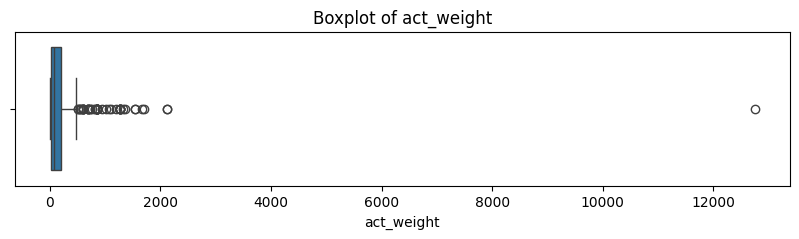

In [ ]:
show_stats(data=fires_df, x='act_weight')

,duration
count,482.000000
mean,11.866252
std,2.875193
min,0.500000
25%,12.000000
50%,12.000000
75%,12.000000
max,36.000000


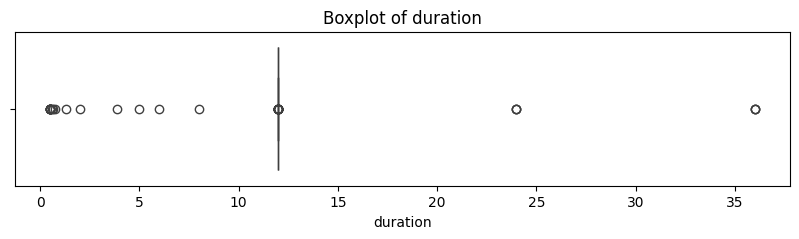

In [ ]:
show_stats(data=fires_df, x='duration')

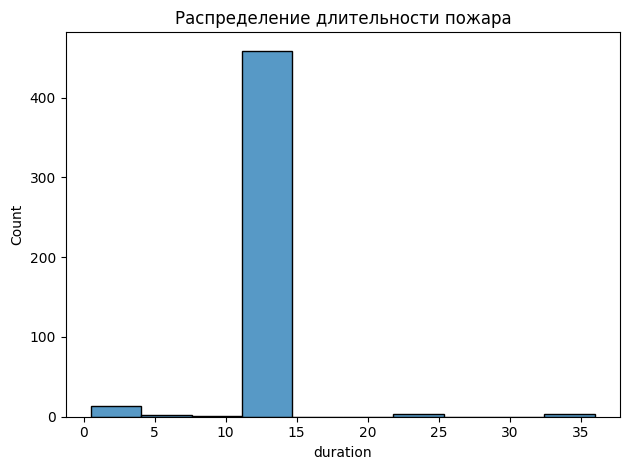

In [ ]:
plt.figure()

ax = sns.histplot(
    data=fires_df,
    x='duration',
   # hue='stack',
    palette='magma'
)

#leg = ax.get_legend()
#leg.set_bbox_to_anchor((1.02, 1))
#leg.set_loc('upper left')
plt.title('Распределение длительности пожара')
plt.tight_layout()
plt.show()

**Длительность половины пожаров составляет 12 часов - время между осмотрами.  
Судя по распределению длительностей пожаров, можно выделить 2 типа.   Слабые - за которыми не следят чаще чем раз в 12 часов, сильные - за которыми наблюдают чаще**

##### Категориальные значения


######Штабеля

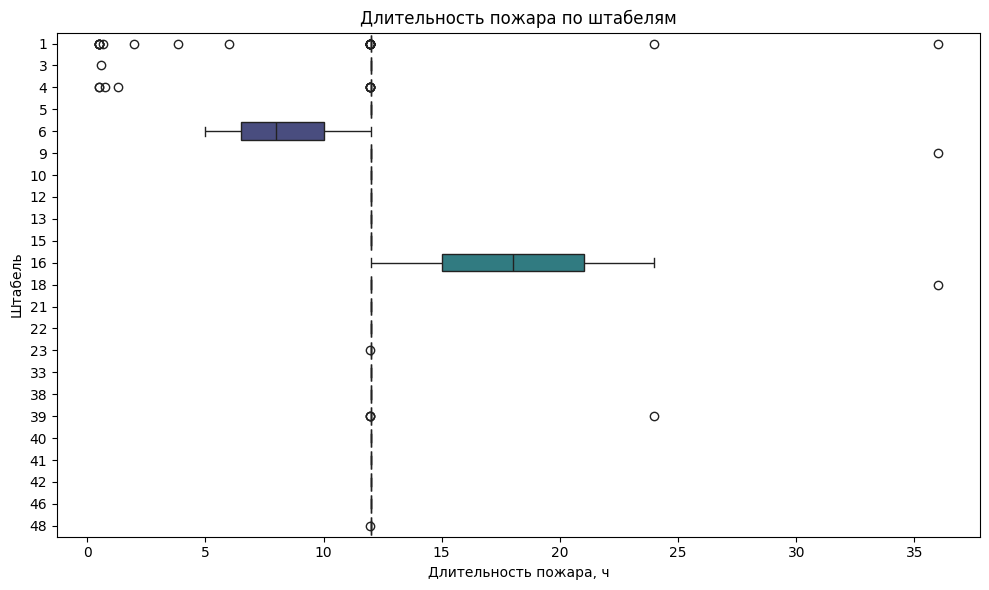

In [ ]:
n_stacks = fires_df['stack'].nunique()
palette = sns.color_palette("viridis", n_colors=n_stacks)

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=fires_df,
    x='duration',
    y='stack',
    orient='h',
    palette=palette
)
ax.set_xlabel('Длительность пожара, ч')
ax.set_ylabel('Штабель')
ax.set_title('Длительность пожара по штабелям')
plt.tight_layout()
plt.show()




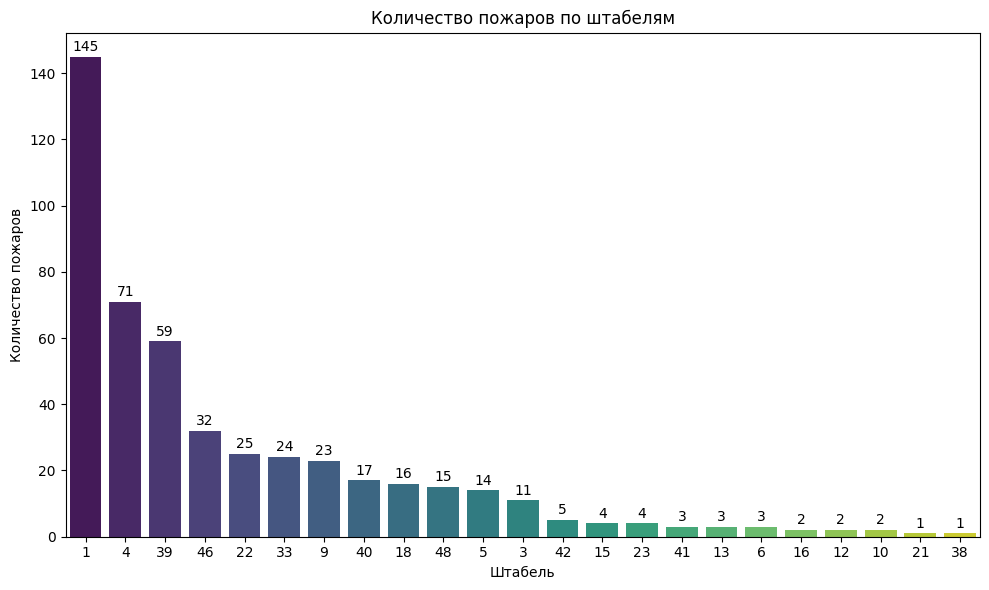

In [ ]:
stack_order = (
    fires_df["stack"]
    .value_counts()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=fires_df,
    x="stack",
    palette=palette,
    order=stack_order
)

ax.set_xlabel("Штабель")
ax.set_ylabel("Количество пожаров")
ax.set_title("Количество пожаров по штабелям")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{int(height)}",
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
        xytext=(0, 2),
        textcoords="offset points",
    )

plt.tight_layout()
plt.show()

######Типы угля

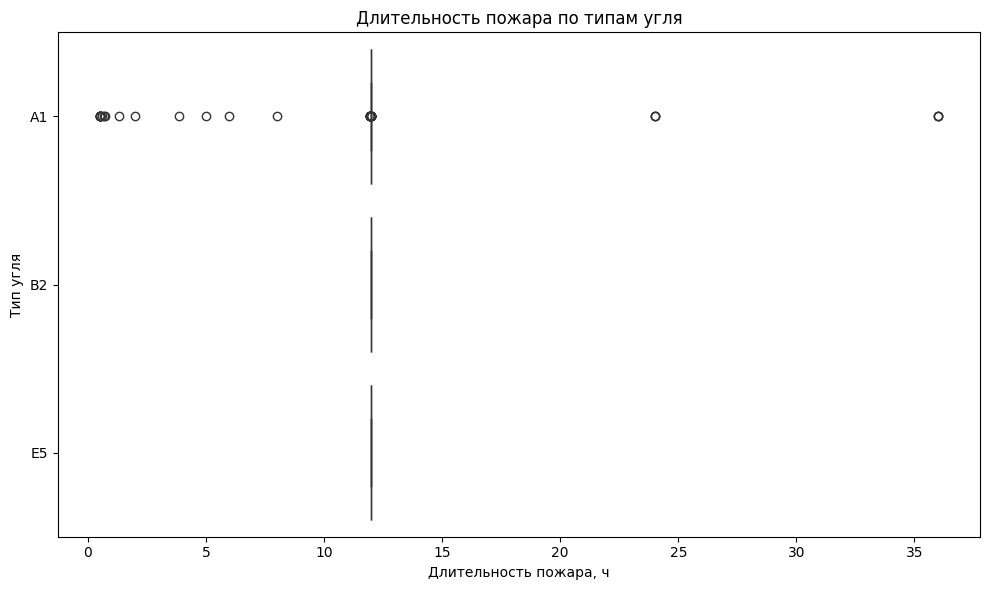

In [ ]:
n_cargo = fires_df['coal_name'].nunique()
palette = sns.color_palette("viridis", n_colors=n_cargo)

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=fires_df,
    x='duration',
    y='coal_name',
    orient='h',
    palette=palette
)
ax.set_xlabel('Длительность пожара, ч')
ax.set_ylabel('Тип угля')
ax.set_title('Длительность пожара по типам угля')
plt.tight_layout()
plt.show()




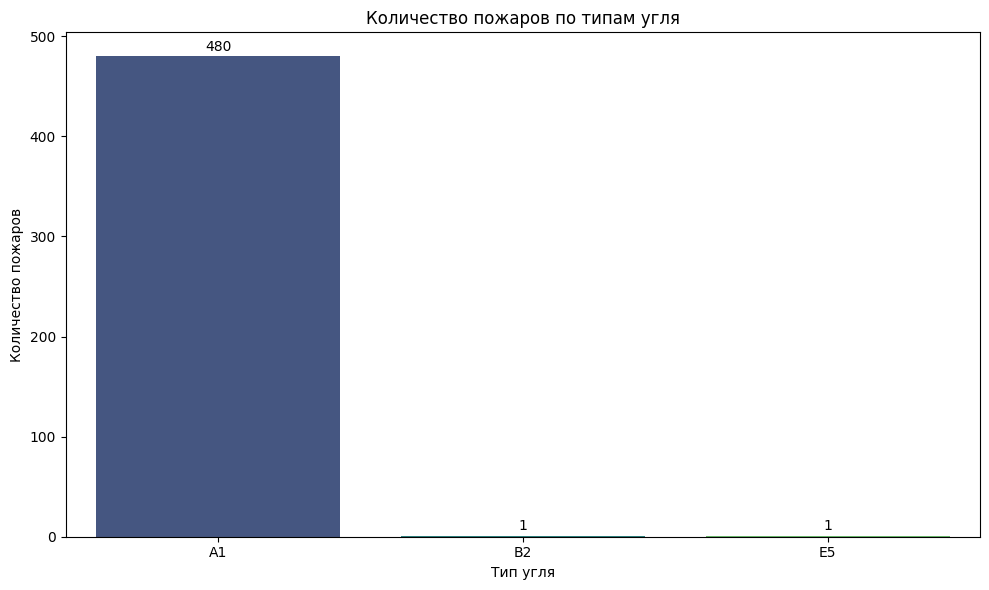

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=fires_df,
    x='coal_name',
    palette=palette
)
ax.set_xlabel('Тип угля')
ax.set_ylabel('Количество пожаров')
ax.set_title('Количество пожаров по типам угля')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{int(height)}',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        xytext=(0, 2),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

####Временной анализ

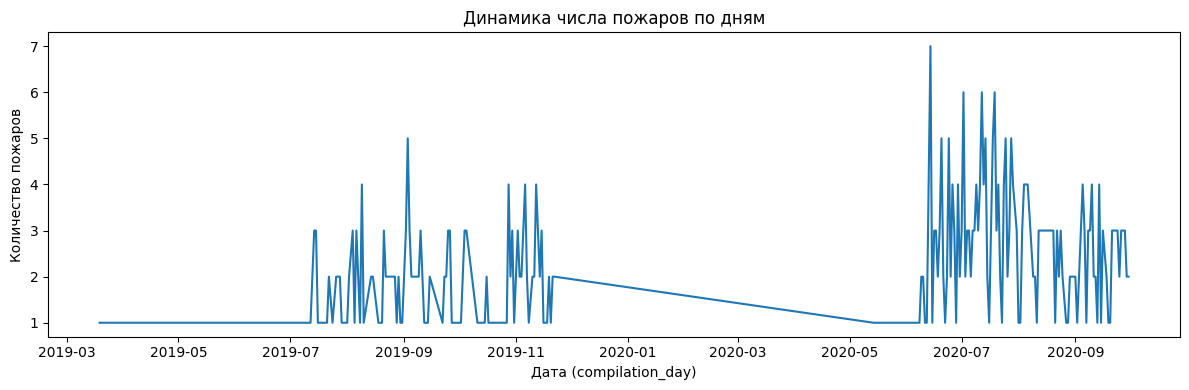

In [ ]:
# количество пожаров по дням по колонке compilation_date
fires_df['compilation_day'] = fires_df['compilation_date'].dt.date

fires_per_day = (
    fires_df
    .groupby('compilation_day')
    .size()
    .rename('fires_count')
)

plt.figure(figsize=(12, 4))
fires_per_day.plot()
plt.xlabel('Дата (compilation_day)')
plt.ylabel('Количество пожаров')
plt.title('Динамика числа пожаров по дням')
plt.tight_layout()
plt.show()


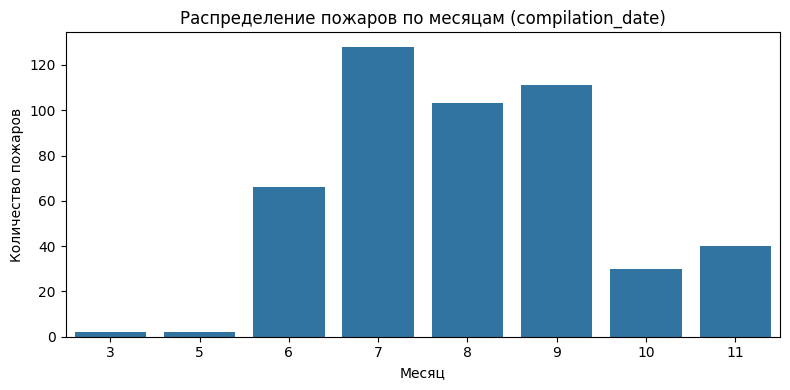

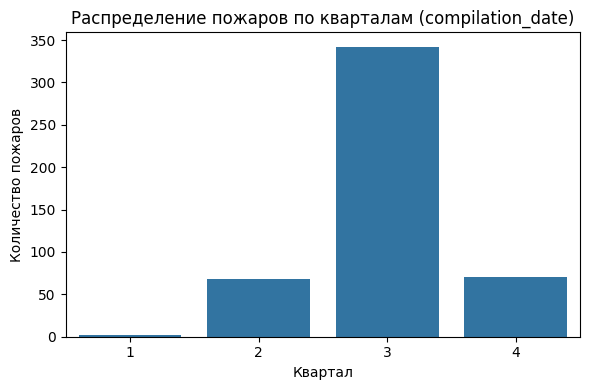

In [ ]:
# месяц и квартал по дате компиляции
fires_df['comp_month'] = fires_df['compilation_date'].dt.month
fires_df['comp_quarter'] = fires_df['compilation_date'].dt.quarter

plt.figure(figsize=(8, 4))
sns.countplot(data=fires_df, x='comp_month')
plt.xlabel('Месяц')
plt.ylabel('Количество пожаров')
plt.title('Распределение пожаров по месяцам (compilation_date)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=fires_df, x='comp_quarter')
plt.xlabel('Квартал')
plt.ylabel('Количество пожаров')
plt.title('Распределение пожаров по кварталам (compilation_date)')
plt.tight_layout()
plt.show()


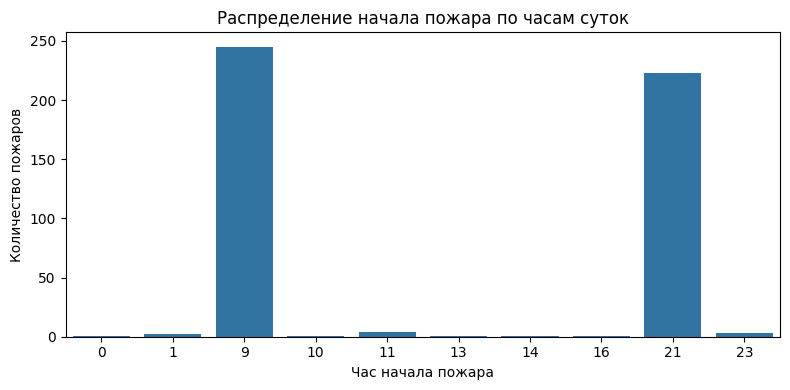

In [ ]:
# час начала пожара
fires_df['start_hour'] = fires_df['start_date'].dt.hour

plt.figure(figsize=(8, 4))
sns.countplot(data=fires_df, x='start_hour')
plt.xlabel('Час начала пожара')
plt.ylabel('Количество пожаров')
plt.title('Распределение начала пожара по часам суток')
plt.tight_layout()
plt.show()


####Возраст штабеля

In [ ]:
fires_df['days_after_formation'] = (
    fires_df['start_date'] - fires_df['stack_formation_date']
).dt.total_seconds() / (24 * 3600)

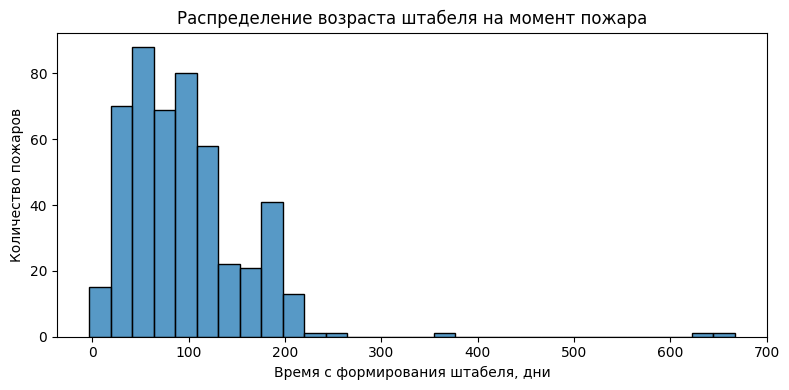

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=fires_df,
    x='days_after_formation',
    bins=30,
    kde=False
)
plt.xlabel('Время с формирования штабеля, дни')
plt.ylabel('Количество пожаров')
plt.title('Распределение возраста штабеля на момент пожара')
plt.tight_layout()
plt.show()

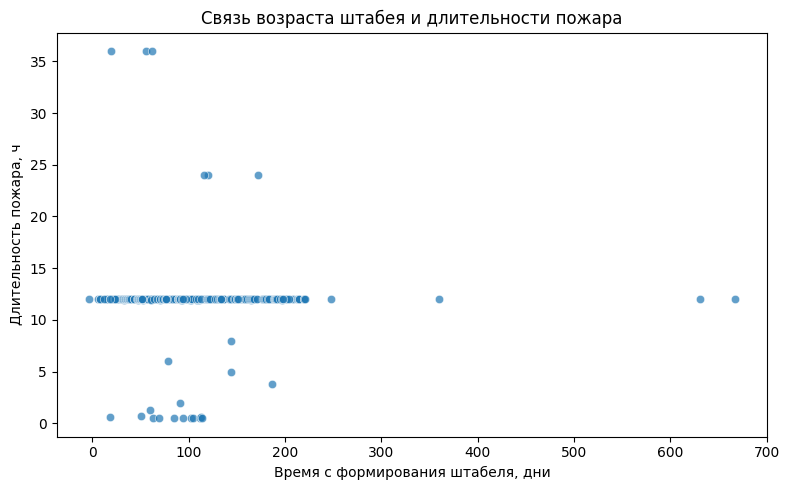

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=fires_df,
    x='days_after_formation',
    y='duration',
    alpha=0.7
)
plt.xlabel('Время с формирования штабеля, дни')
plt.ylabel('Длительность пожара, ч')
plt.title('Связь возраста штабея и длительности пожара')
plt.tight_layout()
plt.show()


#### **Корреляция**

In [ ]:
corr_pearson = fires_df[['days_after_formation', 'duration']].corr(method='pearson').iloc[0, 1]
corr_spearman = fires_df[['days_after_formation', 'duration']].corr(method='spearman').iloc[0, 1]
print('Кореляция возраст штабеля vs длительность пожара')
print(f'Корреляция Пирсона:  {corr_pearson:.3f}')
print(f'Корреляция Спирмена: {corr_spearman:.3f}')


Кореляция возраст штабеля vs длительность пожара
Корреляция Пирсона:  -0.017
Корреляция Спирмена: -0.048


In [ ]:
# агрегируем по штабелю:
# fires_count — сколько пожаров на этом stack
# mean_days_after_formation — средний возраст штабеля на момент пожаров
stack_stats = (
    fires_df
    .groupby('stack')
    .agg(
        fires_count=('stack', 'size'),
        mean_days_after_formation=('days_after_formation', 'mean')
    )
    .reset_index()
)

corr_pearson = stack_stats[['mean_days_after_formation', 'fires_count']].corr(
    method='pearson'
).iloc[0, 1]

corr_spearman = stack_stats[['mean_days_after_formation', 'fires_count']].corr(
    method='spearman'
).iloc[0, 1]

print('Корреляция возраст штабеля vs частота (количество пожаров на штабель)')
print(f'Корреляция Пирсона:  {corr_pearson:.3f}')
print(f'Корреляция Спирмена: {corr_spearman:.3f}')

Корреляция возраст штабеля vs частота (количество пожаров на штабель)
Корреляция Пирсона:  -0.071
Корреляция Спирмена: 0.028


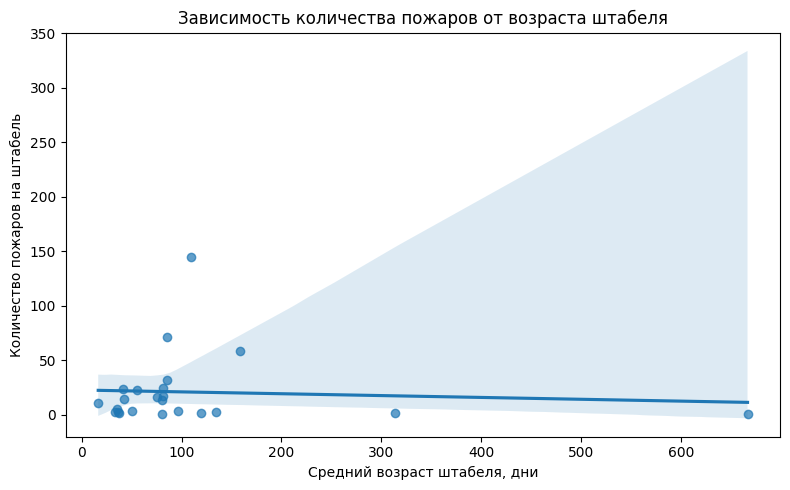

In [ ]:
plt.figure(figsize=(8, 5))

sns.regplot(
    data=stack_stats,
    x='mean_days_after_formation',
    y='fires_count',
    scatter_kws={'alpha': 0.7}
)

plt.xlabel('Средний возраст штабеля, дни')
plt.ylabel('Количество пожаров на штабель')
plt.title('Зависимость количества пожаров от возраста штабеля')

plt.tight_layout()
plt.show()


### Supplies

In [ ]:
supplies_df.head()

,load_to_depot_date,coal_name,stack,load_to_ship_date,input_weight,output_weight,depot
0,2019-01-02,E5,1,2019-01-02,11984.1925,11984.1925,3
1,2019-01-02,A1,34,2019-01-02,3913.8250,3913.8250,3
2,2019-01-02,A1,37,2019-01-02,11626.9120,11626.9120,3
3,2019-01-02,A1,44,2019-01-02,184.7815,184.7815,4
4,2019-01-02,C3,22,2019-01-02,9520.3315,9520.3315,3


**Малоинформативный датасет. Есть связь между принятым в депо типом угля и его штабелем**

###Temperature

In [ ]:
temperature_df.head()

,depot,stack,coal_name,max_temp,piket,act_date,shift
0,3,43,A1,36.2,3045-3075,2020-08-05,219.0
1,4,39,A1,109.4,4025-4047,2020-08-05,219.0
2,4,23,A1,38.6,4048-4052,2020-08-05,219.0
3,4,46,A1,37.3,4057-4077,2020-08-05,219.0
4,4,12,A1,36.4,4091-4112,2020-08-05,219.0


###### Температура

,max_temp
count,4106.000000
mean,44.563809
std,49.552172
min,0.000000
25%,27.100000
50%,33.900000
75%,38.900000
max,679.000000


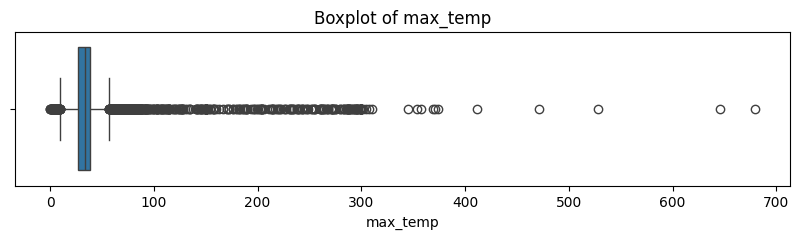

In [ ]:
show_stats(data=temperature_df, x='max_temp')

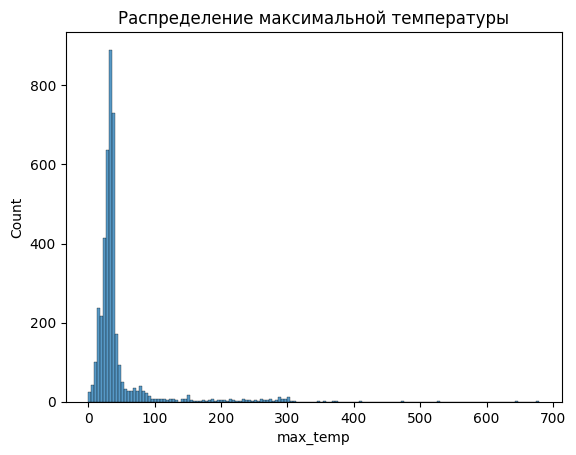

In [ ]:
sns.histplot(data=temperature_df, x='max_temp', bins=150)
plt.title('Распределение максимальной температуры')
plt.show()

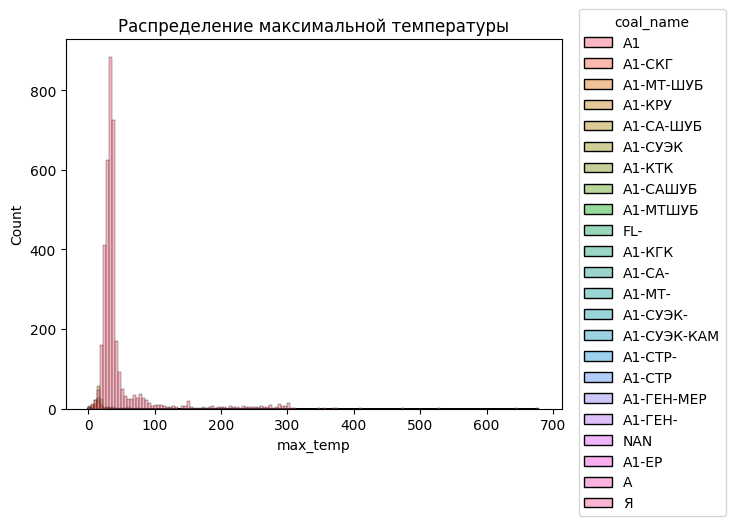

In [ ]:
ax = sns.histplot(data=temperature_df, x='max_temp', bins=150, hue='coal_name')
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.02, 1.1))
leg.set_loc('upper left')
plt.title('Распределение максимальной температуры')
plt.show()

**Нужна чистка по coal_name.  
Данные есть только по А1-типу, нет B1 и B2(о них есть данные в пожарах)**

In [ ]:
temperature_df.coal_name.unique()

array(['A1', 'A1-СКГ', 'A1-МТ-ШУБ', 'A1-КРУ', 'A1-СА-ШУБ', 'A1-СУЭК',
       'A1-КТК', 'A1-САШУБ', 'A1-МТШУБ', 'FL-', 'A1-КГК', 'A1-СА-',
       'A1-МТ-', 'A1-СУЭК-', 'A1-СУЭК-КАМ', 'A1-СТР-', 'A1-СТР',
       'A1-ГЕН-МЕР', 'A1-ГЕН-', 'NAN', 'A1-ЕР', 'А', 'Я'], dtype=object)

In [ ]:
def clean_coal_name(value):
    if pd.isna(value):
        return "other"

    s = str(value).strip().upper()

    if s in {"NAN", ""}:
        return "other"

    if s in {"А", "Я", 'FL-'}:
        return "other"

    if s.startswith("A1"):
        return "A1"

    return s


In [ ]:
temperature_df["coal_name_clean"] = temperature_df["coal_name"].apply(clean_coal_name)
temperature_df["coal_name_clean"].value_counts()

,count
coal_name_clean,
A1,4095
other,11


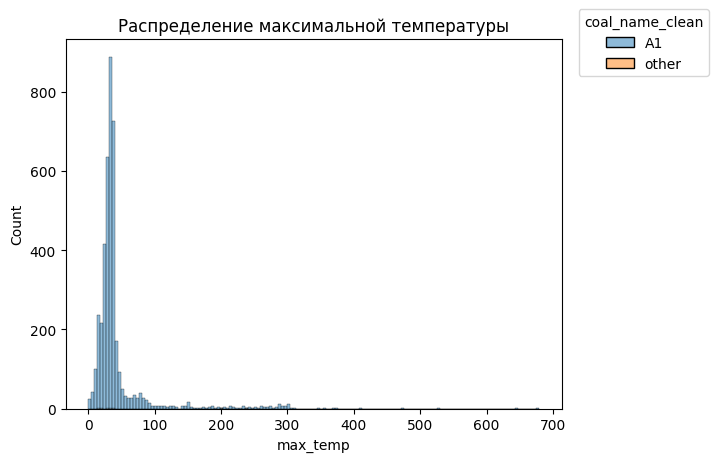

In [ ]:
ax = sns.histplot(data=temperature_df, x='max_temp', bins=150, hue='coal_name_clean')
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.02, 1.1))
leg.set_loc('upper left')
plt.title('Распределение максимальной температуры')
plt.show()

In [ ]:
temperature_df["act_day"] = temperature_df["act_date"].dt.date
temperature_df["year"] = temperature_df["act_date"].dt.year
temperature_df["month"] = temperature_df["act_date"].dt.month

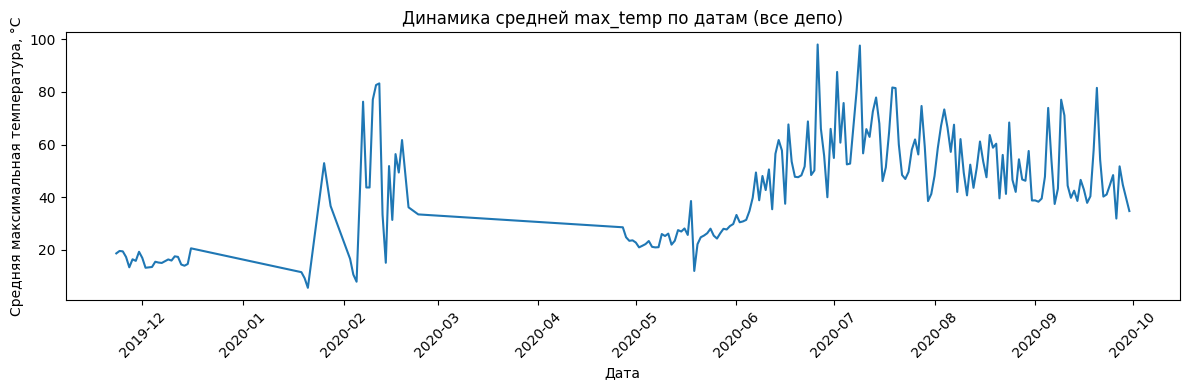

In [ ]:
daily_mean = (
    temperature_df
    .groupby("act_day")["max_temp"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 4))
sns.lineplot(
    data=daily_mean,
    x="act_day",
    y="max_temp"
)
plt.xlabel("Дата")
plt.ylabel("Средняя максимальная температура, °C")
plt.title("Динамика средней max_temp по датам (все депо)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


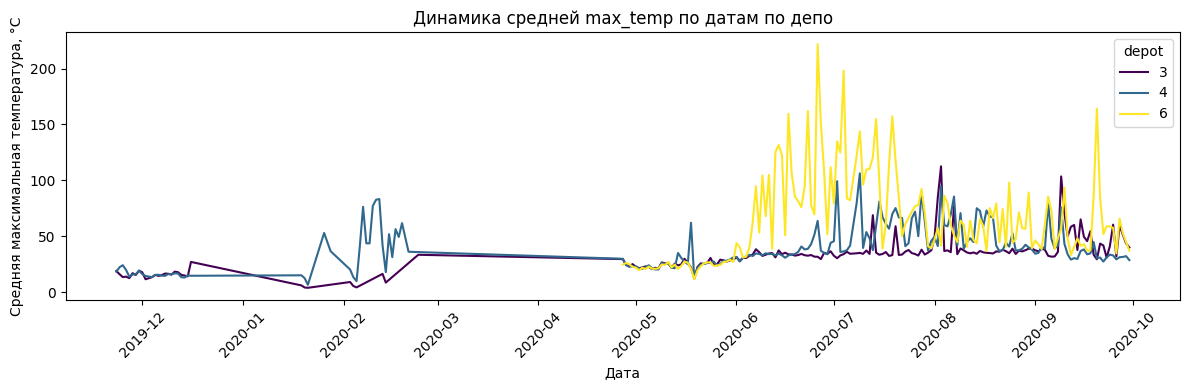

In [ ]:
daily_mean_depot = (
    temperature_df
    .groupby(["act_day", "depot"])["max_temp"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 4))
sns.lineplot(
    data=daily_mean_depot,
    x="act_day",
    y="max_temp",
    hue="depot",
    palette="viridis"
)
plt.xlabel("Дата")
plt.ylabel("Средняя максимальная температура, °C")
plt.title("Динамика средней max_temp по датам по депо")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


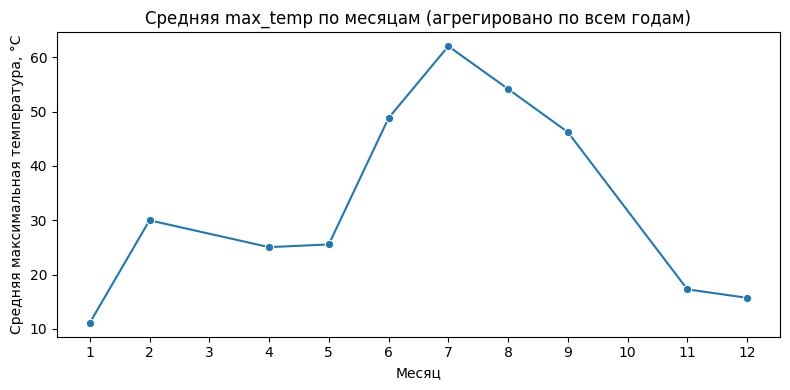

In [ ]:
monthly_mean = (
    temperature_df
    .groupby("month")["max_temp"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8, 4))
sns.lineplot(
    data=monthly_mean,
    x="month",
    y="max_temp",
    marker="o"
)
plt.xlabel("Месяц")
plt.ylabel("Средняя максимальная температура, °C")
plt.title("Средняя max_temp по месяцам (агрегировано по всем годам)")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


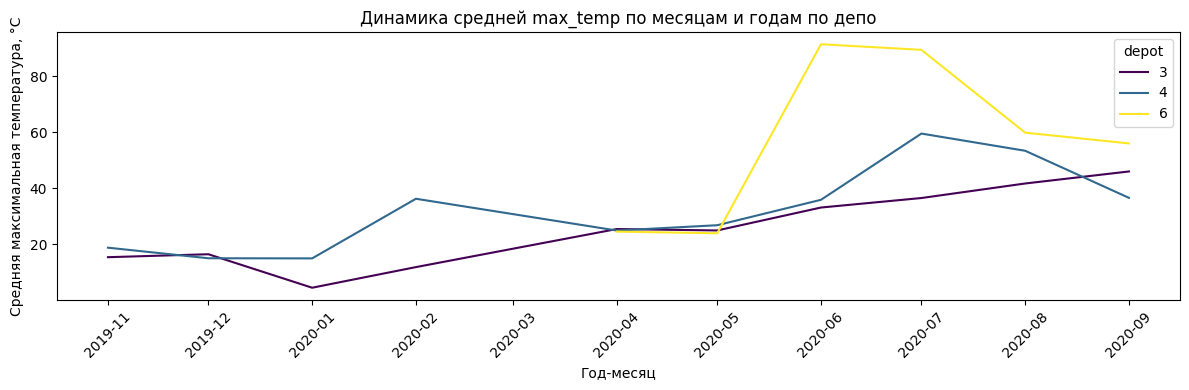

In [ ]:
monthly_mean_depot = (
    temperature_df
    .groupby(["year", "month", "depot"])["max_temp"]
    .mean()
    .reset_index()
)

monthly_mean_depot["year_month"] = pd.to_datetime(
    dict(
        year=monthly_mean_depot["year"],
        month=monthly_mean_depot["month"],
        day=1
    )
)

plt.figure(figsize=(12, 4))

ax = sns.lineplot(
    data=monthly_mean_depot,
    x="year_month",
    y="max_temp",
    hue="depot",
    palette="viridis"
)

ax.set_xlabel("Год-месяц")
ax.set_ylabel("Средняя максимальная температура, °C")
ax.set_title("Динамика средней max_temp по месяцам и годам по депо")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

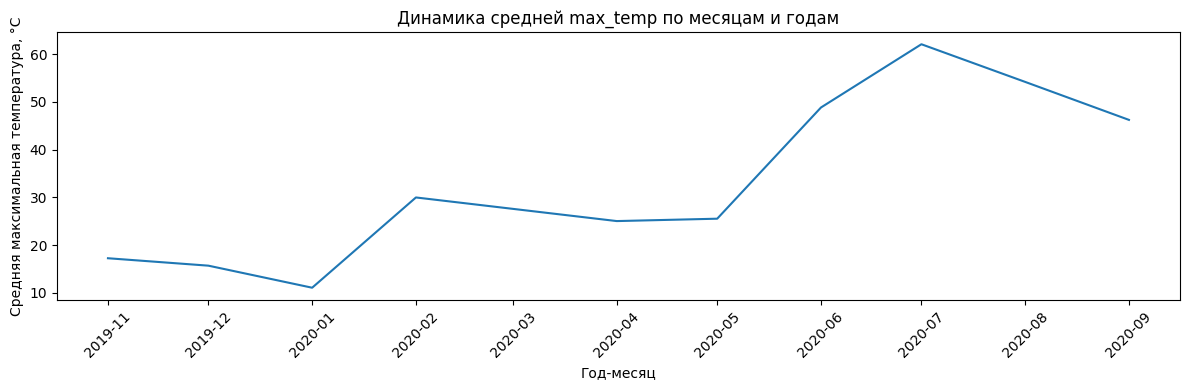

In [ ]:
monthly_mean_ym = (
    temperature_df
    .groupby(["year", "month"])["max_temp"]
    .mean()
    .reset_index()
)

monthly_mean_ym["year_month"] = pd.to_datetime(
    dict(year=monthly_mean_ym["year"],
         month=monthly_mean_ym["month"],
         day=1)
)

plt.figure(figsize=(12, 4))
sns.lineplot(
    data=monthly_mean_ym,
    x="year_month",
    y="max_temp"
)
plt.xlabel("Год-месяц")
plt.ylabel("Средняя максимальная температура, °C")
plt.title("Динамика средней max_temp по месяцам и годам")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#####Депо

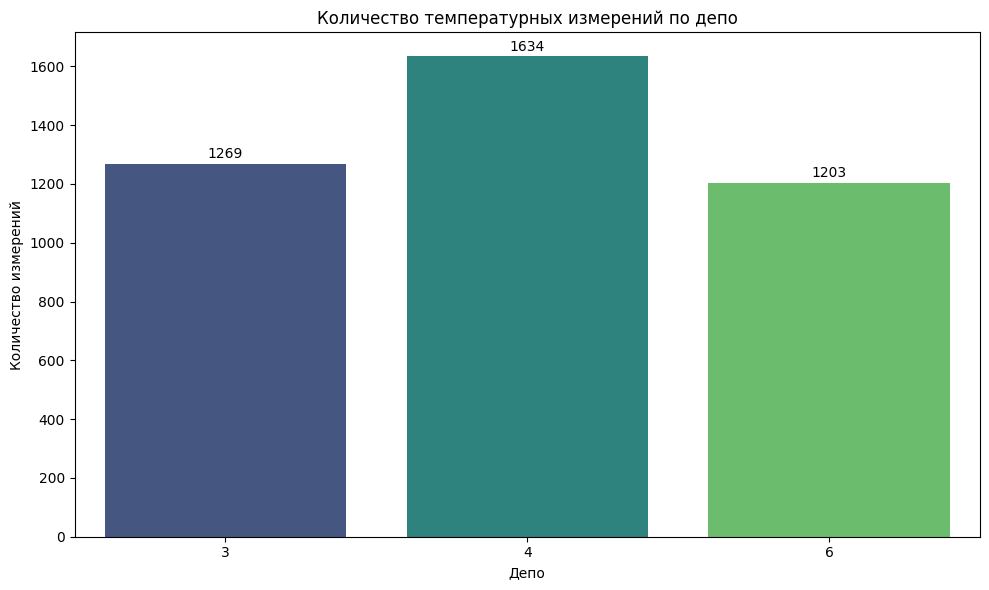

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(
    data=temperature_df,
    x="depot",
    palette="viridis"
)

ax.set_xlabel("Депо")
ax.set_ylabel("Количество измерений")
ax.set_title("Количество температурных измерений по депо")

for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        str(count),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        xytext=(0, 2),
        textcoords="offset points"
    )

plt.tight_layout()
plt.show()


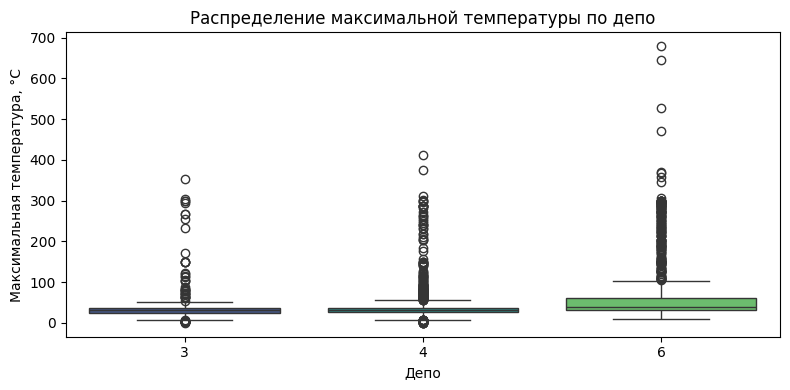

In [ ]:
plt.figure(figsize=(8, 4))

ax = sns.boxplot(
    data=temperature_df,
    x="depot",
    y="max_temp",
    palette="viridis"
)

ax.set_xlabel("Депо")
ax.set_ylabel("Максимальная температура, °C")
ax.set_title("Распределение максимальной температуры по депо")

plt.tight_layout()
plt.show()


In [ ]:
temp_stats_by_depot = (
    temperature_df
    .groupby("depot")["max_temp"]
    .describe()
    .reset_index()
)

temp_stats_by_depot

,depot,count,mean,std,min,25%,50%,75%,max
0,3,1269.0,32.389992,25.803964,0.6,24.6,31.4,35.90,354.0
1,4,1634.0,38.196818,37.313909,0.0,25.5,32.8,37.50,411.0
2,6,1203.0,66.053616,71.539175,9.7,32.2,38.8,60.95,679.0


##### Штабеля

,stack,n_measurements
0,0,1
14,15,1
50,60,1
2,2,2
49,58,3
51,62,3
20,22,3
46,53,7
8,8,9
39,44,11


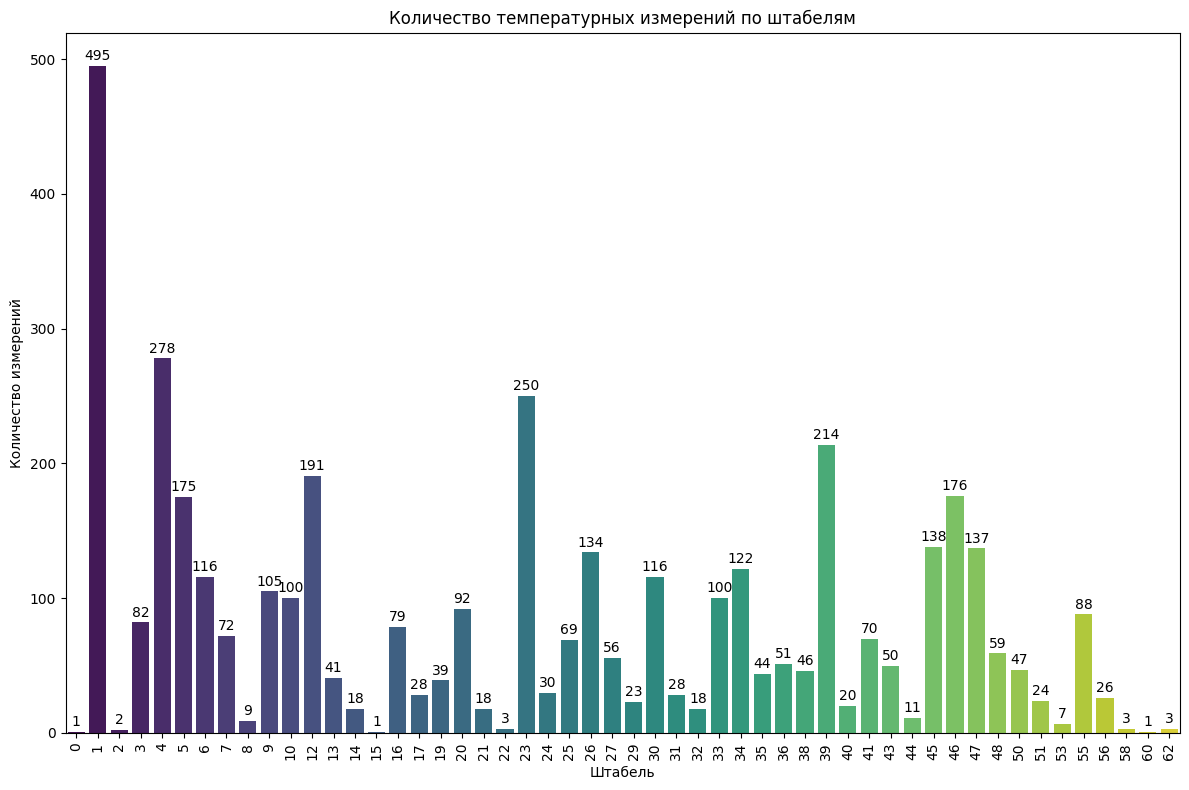

In [ ]:
stack_counts = (
    temperature_df
    .groupby("stack")
    .size()
    .rename("n_measurements")
    .reset_index()
)

display(stack_counts.sort_values("n_measurements", ascending=True).head(10))

plt.figure(figsize=(12, 8))

ax = sns.barplot(
    data=stack_counts,
    x="stack",
    y="n_measurements",
    palette="viridis"
)

ax.set_xlabel("Штабель")
ax.set_ylabel("Количество измерений")
ax.set_title("Количество температурных измерений по штабелям")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{int(height)}",
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
        xytext=(0, 2),
        textcoords="offset points"
    )

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

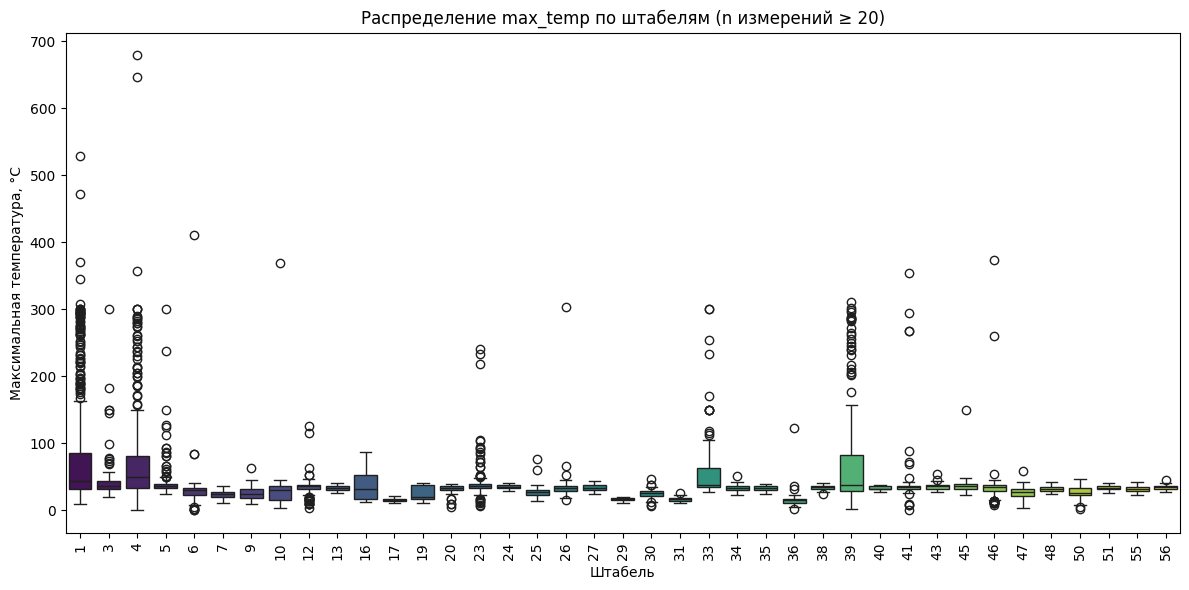

In [ ]:
min_count = 20

valid_stacks = stack_counts.loc[
    stack_counts["n_measurements"] >= min_count, "stack"
]

temp_stacks_enough = temperature_df[
    temperature_df["stack"].isin(valid_stacks)
].copy()

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=temp_stacks_enough,
    x="stack",
    y="max_temp",
    palette="viridis"
)
ax.set_xlabel("Штабель")
ax.set_ylabel("Максимальная температура, °C")
ax.set_title(
    f"Распределение max_temp по штабелям (n измерений ≥ {min_count})"
)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


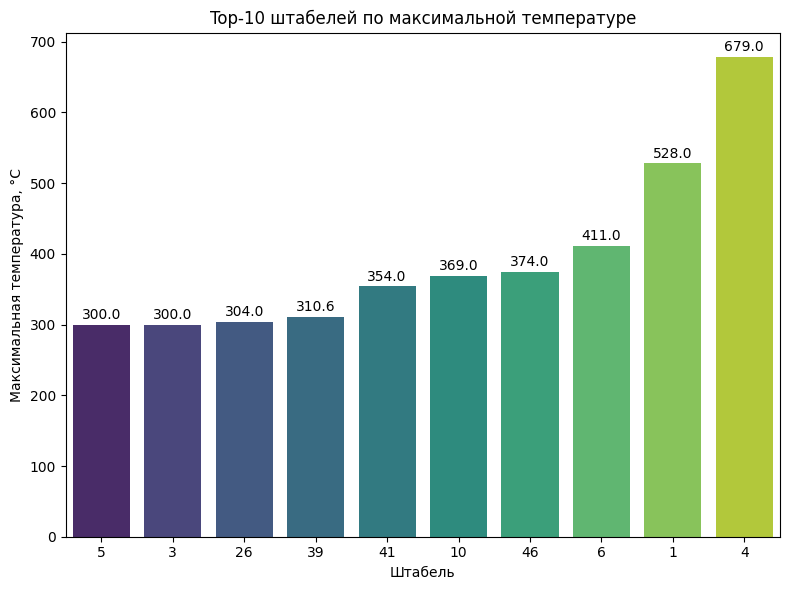

In [ ]:
top_n = 10

stack_temp_stats = (
    temperature_df
    .groupby("stack")["max_temp"]
    .agg(
        n_measurements="count",
        mean_temp="mean",
        max_temp="max"
    )
    .reset_index()
)

top_stacks = (
    stack_temp_stats
    .sort_values("max_temp", ascending=False)
    .head(top_n)
)


order = top_stacks.sort_values("max_temp")["stack"]

plt.figure(figsize=(8, 6))

ax = sns.barplot(
    data=top_stacks,
    x="stack",
    y="max_temp",
    palette="viridis",
    order=order
)

ax.set_xlabel("Штабель")
ax.set_ylabel("Максимальная температура, °C")
ax.set_title(f"Top-{top_n} штабелей по максимальной температуре")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.1f}",
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
        xytext=(0, 2),
        textcoords="offset points"
    )

plt.tight_layout()
plt.show()


## Связь погоды и пожаров

In [ ]:
weather_df = pd.concat(
    [
        weather_15_df,
        weather_16_df,
        weather_17_df,
        weather_18_df,
        weather_19_df,
        weather_20_df,
        weather_21_df,
    ],
    ignore_index=True,
)
weather_df = weather_df.rename(
    columns={
        "t": "temp_air",
    }
)

weather_df["date"] = pd.to_datetime(weather_df["date"])
weather_df["date"] = weather_df["date"].dt.normalize()

daily_weather = (
    weather_df
    .groupby("date", as_index=False)
    .agg(
        temp_air_min=("temp_air", "min"),
        temp_air_max=("temp_air", "max"),
        temp_air_mean=("temp_air", "mean"),
        humidity_min=("humidity", "min"),
        humidity_max=("humidity", "max"),
        humidity_mean=("humidity", "mean"),
        precipitation_min=("precipitation", "min"),
        precipitation_max=("precipitation", "max"),
        precipitation_mean=("precipitation", "mean"),
    )
)

In [ ]:
daily_weather.head()

,date,temp_air_min,temp_air_max,temp_air_mean,humidity_min,humidity_max,humidity_mean,precipitation_min,precipitation_max,precipitation_mean
0,2015-01-01,-2.7,-1.4,-2.083333,62,78,72.958333,0.0,0.0,0.000000
1,2015-01-02,-1.3,6.7,2.154167,65,78,70.708333,0.0,0.0,0.000000
2,2015-01-03,2.4,7.4,5.750000,75,93,82.458333,0.0,0.6,0.100000
3,2015-01-04,3.2,7.1,5.141667,58,85,71.375000,0.0,1.1,0.129167
4,2015-01-05,1.6,6.4,3.333333,57,97,76.041667,0.0,1.8,0.254167


In [ ]:
fires_df.head()

,compilation_date,coal_name,act_weight,depot,start_date,end_date,stack_formation_date,stack,duration,compilation_day,comp_month,comp_quarter,start_hour,days_after_formation
0,2019-03-19,A1,255.0,4,2019-03-19 09:00:00,2019-03-19 21:00:00,2018-11-23 00:00:00,6,12.0,2019-03-19,3,1,9,116.375000
1,2019-03-24,B2,42.5,3,2019-03-24 09:00:00,2019-03-24 21:00:00,2019-01-03 00:00:00,21,12.0,2019-03-24,3,1,9,80.375000
3,2019-06-11,A1,127.5,4,2019-06-11 09:00:00,2019-06-11 21:00:00,2019-04-28 23:55:00,15,12.0,2019-06-11,6,2,9,43.378472
4,2019-07-07,A1,127.5,4,2019-07-06 21:00:00,2019-07-07 09:00:00,2019-05-19 00:00:00,22,12.0,2019-07-07,7,3,21,48.875000
5,2019-07-10,A1,85.0,4,2019-07-10 09:00:00,2019-07-10 21:00:00,2019-05-19 00:00:00,22,12.0,2019-07-10,7,3,9,52.375000


In [ ]:
fires_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 0 to 485
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   compilation_date      482 non-null    datetime64[ns]
 1   coal_name             482 non-null    object        
 2   act_weight            482 non-null    float64       
 3   depot                 482 non-null    int64         
 4   start_date            482 non-null    datetime64[ns]
 5   end_date              482 non-null    datetime64[ns]
 6   stack_formation_date  482 non-null    datetime64[ns]
 7   stack                 482 non-null    int64         
 8   duration              482 non-null    float64       
 9   compilation_day       482 non-null    object        
 10  comp_month            482 non-null    int32         
 11  comp_quarter          482 non-null    int32         
 12  start_hour            482 non-null    int32         
 13  days_after_formation  482

In [ ]:
fires_weather_df = fires_df.copy()
fires_weather_df["fire_date"] = fires_weather_df["start_date"].dt.normalize()

fires_weather_df = fires_weather_df.merge(
    daily_weather,
    left_on="fire_date",
    right_on="date",
    how="left"
)

fires_weather_df = fires_weather_df.drop(columns=["date"])

fires_weather_df.head()

,compilation_date,coal_name,act_weight,depot,start_date,end_date,stack_formation_date,stack,duration,compilation_day,...,fire_date,temp_air_min,temp_air_max,temp_air_mean,humidity_min,humidity_max,humidity_mean,precipitation_min,precipitation_max,precipitation_mean
0,2019-03-19,A1,255.0,4,2019-03-19 09:00:00,2019-03-19 21:00:00,2018-11-23 00:00:00,6,12.0,2019-03-19,...,2019-03-19,6.3,9.2,7.566667,74,93,85.208333,0.0,0.0,0.000000
1,2019-03-24,B2,42.5,3,2019-03-24 09:00:00,2019-03-24 21:00:00,2019-01-03 00:00:00,21,12.0,2019-03-24,...,2019-03-24,3.9,6.0,4.933333,53,84,67.875000,0.0,0.1,0.033333
2,2019-06-11,A1,127.5,4,2019-06-11 09:00:00,2019-06-11 21:00:00,2019-04-28 23:55:00,15,12.0,2019-06-11,...,2019-06-11,23.7,27.4,25.708333,55,69,59.541667,0.0,0.0,0.000000
3,2019-07-07,A1,127.5,4,2019-07-06 21:00:00,2019-07-07 09:00:00,2019-05-19 00:00:00,22,12.0,2019-07-07,...,2019-07-06,22.0,24.3,23.258333,47,78,63.250000,0.0,0.0,0.000000
4,2019-07-10,A1,85.0,4,2019-07-10 09:00:00,2019-07-10 21:00:00,2019-05-19 00:00:00,22,12.0,2019-07-10,...,2019-07-10,20.1,22.7,21.504167,64,83,72.875000,0.0,1.7,0.070833


In [ ]:
fw = fires_weather_df.copy()

temp_bins = np.arange(-15, 41, 5)
hum_bins = np.arange(0, 101, 5)
precip_bins = [0, 0.1, 1, 5, 10, 20, 50,]

fw["temp_bin"] = pd.cut(fw["temp_air_mean"], bins=temp_bins, include_lowest=True)
fw["hum_bin"] = pd.cut(fw["humidity_mean"], bins=hum_bins, include_lowest=True)
fw["precip_bin"] = pd.cut(fw["precipitation_mean"], bins=precip_bins, include_lowest=True)

fires_by_temp = (
    fw.groupby("temp_bin", observed=True)
    .size()
    .reset_index(name="n_fires")
    .sort_values("temp_bin")
)

fires_by_humidity = (
    fw.groupby("hum_bin", observed=True)
    .size()
    .reset_index(name="n_fires")
    .sort_values("hum_bin")
)

fires_by_precip = (
    fw.groupby("precip_bin", observed=True)
    .size()
    .reset_index(name="n_fires")
    .sort_values("precip_bin")
)


Text(0, 0.5, 'Число пожаров')

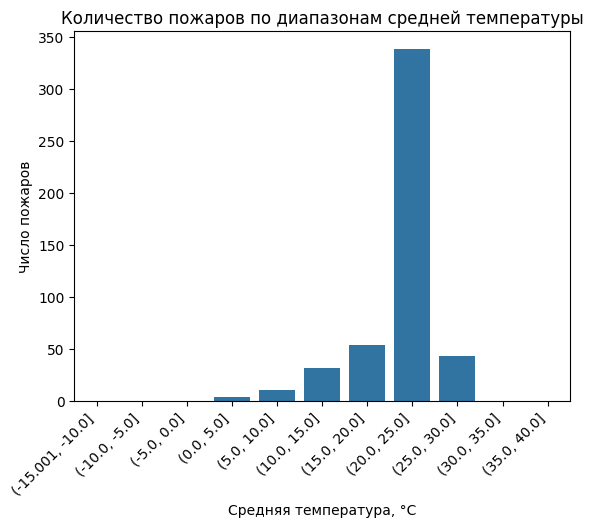

In [ ]:
sns.barplot(
    data=fires_by_temp,
    x="temp_bin",
    y="n_fires"
)
plt.xticks(rotation=45, ha="right")
plt.title("Количество пожаров по диапазонам средней температуры")
plt.xlabel("Средняя температура, °C")
plt.ylabel("Число пожаров")

Text(0, 0.5, 'Число пожаров')

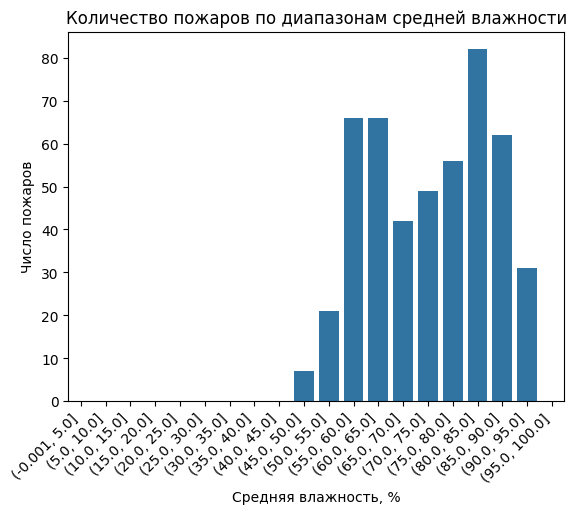

In [ ]:
sns.barplot(
    data=fires_by_humidity,
    x="hum_bin",
    y="n_fires"
)
plt.xticks(rotation=45, ha="right")
plt.title("Количество пожаров по диапазонам средней влажности")
plt.xlabel("Средняя влажность, %")
plt.ylabel("Число пожаров")

Text(0, 0.5, 'Число пожаров')

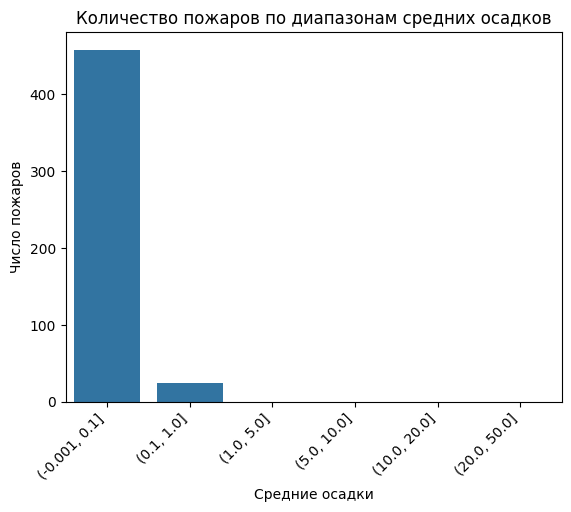

In [ ]:
sns.barplot(
    data=fires_by_precip,
    x="precip_bin",
    y="n_fires"
)
plt.xticks(rotation=45, ha="right")
plt.title("Количество пожаров по диапазонам средних осадков")
plt.xlabel("Средние осадки")
plt.ylabel("Число пожаров")

In [ ]:
temperature_df.to_csv('/content/drive/MyDrive/data_charcoal/temperature_df.csv')

In [ ]:
fires_df.to_csv('/content/drive/MyDrive/data_charcoal/fires_df.csv')

# Агрегация во временные ряды (НЕ РАБОЧИЙ ВАРИАНТ)

In [ ]:
weather_df = pd.concat(
    [
        weather_15_df,
        weather_16_df,
        weather_17_df,
        weather_18_df,
        weather_19_df,
        weather_20_df,
        weather_21_df,
    ],
    ignore_index=True,
)
weather_df = weather_df.rename(
    columns={
        "t": "temp_air",
    }
)

weather_df["date"] = pd.to_datetime(weather_df["date"])
weather_df["date"] = weather_df["date"].dt.normalize()

daily_weather = (
    weather_df
    .groupby("date", as_index=False)
    .agg(
        temp_air_min=("temp_air", "min"),
        temp_air_max=("temp_air", "max"),
        temp_air_mean=("temp_air", "mean"),
        humidity_min=("humidity", "min"),
        humidity_max=("humidity", "max"),
        humidity_mean=("humidity", "mean"),
        precipitation_min=("precipitation", "min"),
        precipitation_max=("precipitation", "max"),
        precipitation_mean=("precipitation", "mean"),
    )
)


In [ ]:
supplies_df["load_date"] = supplies_df["load_to_depot_date"].dt.normalize()
supplies_df["ship_date"] = supplies_df["load_to_ship_date"].dt.normalize()

In [ ]:
loads = (
    supplies_df
    .dropna(subset=["load_date"])
    .groupby(["depot", "stack", "load_date"], as_index=False)
    .agg(
        n_loads=("input_weight", "size"),
        sum_load=("input_weight", "sum"),
        mean_load=("input_weight", "mean"),
    )
    .rename(columns={"load_date": "date"})
)


In [ ]:
ships = (
    supplies_df
    .dropna(subset=["ship_date"])
    .groupby(["depot", "stack", "ship_date"], as_index=False)
    .agg(
        n_unloads=("output_weight", "size"),
        sum_unload=("output_weight", "sum"),
        mean_unload=("output_weight", "mean"),
    )
    .rename(columns={"ship_date": "date"})
)


In [ ]:
ops_daily = loads.merge(
    ships,
    on=["depot", "stack", "date"],
    how="outer",
)

for col in ["n_loads", "n_unloads"]:
    ops_daily[col] = ops_daily[col].fillna(0).astype(int)

for col in ["sum_load", "sum_unload"]:
    ops_daily[col] = ops_daily[col].fillna(0.0)

ops_daily = ops_daily.sort_values(["depot", "stack", "date"])

ops_daily["net_mass_change"] = ops_daily["sum_load"] - ops_daily["sum_unload"]

ops_daily["stack_mass"] = (
    ops_daily
    .groupby(["depot", "stack"])["net_mass_change"]
    .cumsum()
)


In [ ]:
temperature_df["date"] = temperature_df["act_date"].dt.normalize()

temp_daily = (
    temperature_df
    .groupby(["depot", "stack", "date"], as_index=False)
    .agg(
        stack_temp_mean=("max_temp", "mean"),
    )
)


In [ ]:
stack_daily = ops_daily.merge(
    temp_daily,
    on=["depot", "stack", "date"],
    how="outer",
)

stack_daily = stack_daily.merge(
    daily_weather,
    on="date",
    how="left",
)

stack_daily["stack_id"] = (
    stack_daily["depot"].astype(str) + "_" + stack_daily["stack"].astype(str)
)

stack_daily = stack_daily.sort_values(
    ["depot", "stack", "date"]
).reset_index(drop=True)

stack_daily.head()


,depot,stack,date,n_loads,sum_load,mean_load,n_unloads,sum_unload,mean_unload,net_mass_change,...,temp_air_min,temp_air_max,temp_air_mean,humidity_min,humidity_max,humidity_mean,precipitation_min,precipitation_max,precipitation_mean,stack_id
0,3,0,2020-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.8,16.6,15.566667,72.0,88.0,84.666667,0.0,1.6,0.450000,3_0
1,3,1,2019-01-02,1.0,11984.1925,11984.1925,1.0,11984.1925,11984.1925,0.0,...,4.4,9.4,7.529167,57.0,91.0,75.541667,0.0,0.9,0.216667,3_1
2,3,1,2019-01-06,1.0,11427.7060,11427.7060,1.0,11427.7060,11427.7060,0.0,...,2.3,5.4,3.558333,83.0,93.0,89.583333,0.0,0.9,0.162500,3_1
3,3,1,2019-01-07,1.0,11984.1925,11984.1925,1.0,11984.1925,11984.1925,0.0,...,0.9,3.9,1.816667,73.0,98.0,85.000000,0.0,3.0,0.604167,3_1
4,3,1,2019-01-10,1.0,25899.2620,25899.2620,1.0,25899.2620,25899.2620,0.0,...,6.1,8.8,7.579167,51.0,75.0,63.375000,0.0,1.2,0.216667,3_1


In [ ]:
stack_daily.to_csv('/content/drive/MyDrive/data_charcoal/stack_daily.csv')

In [ ]:
stack_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5453 entries, 0 to 5452
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   depot               5453 non-null   int64         
 1   stack               5453 non-null   int64         
 2   date                5453 non-null   datetime64[ns]
 3   n_loads             4359 non-null   float64       
 4   sum_load            4359 non-null   float64       
 5   mean_load           4359 non-null   float64       
 6   n_unloads           4359 non-null   float64       
 7   sum_unload          4359 non-null   float64       
 8   mean_unload         4359 non-null   float64       
 9   net_mass_change     4359 non-null   float64       
 10  stack_mass          4359 non-null   float64       
 11  stack_temp_mean     2180 non-null   float64       
 12  temp_air_min        5447 non-null   float64       
 13  temp_air_max        5447 non-null   float64     

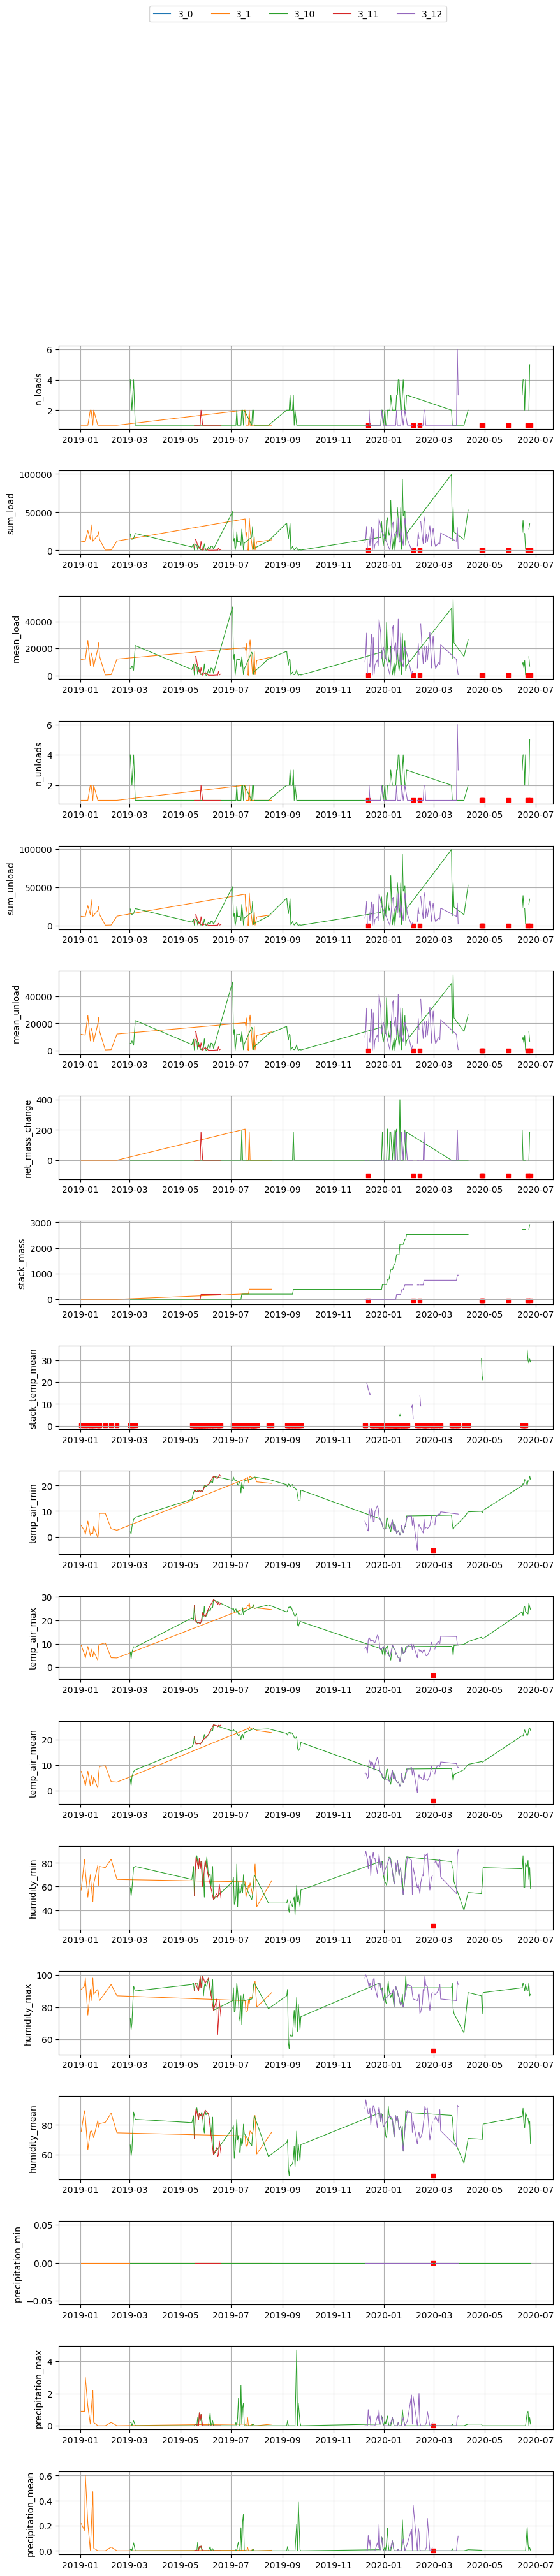

In [ ]:
df_plot = stack_daily.copy()
df_plot["date"] = pd.to_datetime(df_plot["date"])
df_plot["stack_id"] = df_plot["stack_id"].astype(str)

unique_stacks = (
    df_plot["stack_id"]
    .dropna()
    .sort_values()
    .unique()
)
selected_stacks = unique_stacks[:5]

num_cols = [
    c for c in df_plot.select_dtypes(include=[np.number]).columns
    if c not in ("depot", "stack", "id_fire")
]

n = len(num_cols)

fig, axes = plt.subplots(
    nrows=n,
    ncols=1,
    figsize=(10, 2.5 * n),
    sharex=True
)

axes = np.atleast_1d(axes)

for ax, col in zip(axes, num_cols):
    col_values = df_plot[col].astype(float).to_numpy()
    y_min_global = np.nanmin(col_values)

    for sid in selected_stacks:
        df_s = (
            df_plot[df_plot["stack_id"] == sid]
            .sort_values("date")
        )

        x = df_s["date"].to_numpy()
        y = df_s[col].astype(float).to_numpy()

        ax.plot(x, y, linewidth=0.8, label=sid)

        nan_mask = np.isnan(y)
        x_nan = x[nan_mask]
        y_marks = np.full(x_nan.shape, y_min_global)
        ax.scatter(x_nan, y_marks, marker="s", s=25, color="red")

    ax.set_ylabel(col)
    ax.grid(True)
    ax.tick_params(axis="x", labelbottom=True)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="upper center",
    ncol=min(len(labels), 5),
    bbox_to_anchor=(0.5, 1.0)
)

fig.subplots_adjust(hspace=0.5)
plt.show()

# Агрегация по supplies_with_cumsum_fire и погоде во временные ряды (РАБОЧИЙ ВАРИАНТ)

In [ ]:
supplies_with_cumsum_fire = pd.read_csv('/content/drive/MyDrive/data_charcoal/supplies_with_cumsum_fire.csv')

In [ ]:
temp_daily = (
    temperature_df
    .groupby(["depot", "stack", "date"], as_index=False)
    .agg(
        stack_temp_mean=("max_temp", "mean"),
    )
)

In [ ]:
supplies_with_cumsum_fire.head()

,in_date,coal_name,stack,out_date,input_weight,output_weight,depot,event_date,delta_weight,accum_weight
0,2019-01-02,E5,1,2019-02-08,11984.1925,11984.1925,3,2019-01-02,0.0,0.0
1,2019-01-06,E5,1,2019-02-08,11427.7060,11427.7060,3,2019-01-06,0.0,0.0
2,2019-01-07,E5,1,2019-02-08,11984.1925,11984.1925,3,2019-01-07,0.0,0.0
3,2019-01-10,E5,1,2019-02-08,25899.2620,25899.2620,3,2019-01-10,0.0,0.0
4,2019-01-13,E5,1,2019-02-08,185.0535,185.0535,3,2019-01-13,0.0,0.0


In [ ]:
daily_weather.head()

,date,temp_air_min,temp_air_max,temp_air_mean,humidity_min,humidity_max,humidity_mean,precipitation_min,precipitation_max,precipitation_mean
0,2015-01-01,-2.7,-1.4,-2.083333,62,78,72.958333,0.0,0.0,0.000000
1,2015-01-02,-1.3,6.7,2.154167,65,78,70.708333,0.0,0.0,0.000000
2,2015-01-03,2.4,7.4,5.750000,75,93,82.458333,0.0,0.6,0.100000
3,2015-01-04,3.2,7.1,5.141667,58,85,71.375000,0.0,1.1,0.129167
4,2015-01-05,1.6,6.4,3.333333,57,97,76.041667,0.0,1.8,0.254167


In [ ]:
temp_daily.head()

,depot,stack,date,stack_temp_mean
0,3,0,2020-05-29,26.3
1,3,2,2020-09-17,34.1
2,3,4,2020-01-19,5.0
3,3,4,2020-01-20,2.4
4,3,4,2020-01-21,2.8


In [ ]:
temp_daily.describe()

,depot,stack,date,stack_temp_mean
count,2180.000000,2180.000000,2180,2180.000000
mean,4.156422,24.047248,2020-06-15 15:47:53.394495232,40.969049
min,3.000000,0.000000,2019-11-23 00:00:00,0.200000
25%,3.000000,7.000000,2020-05-17 00:00:00,25.800000
50%,4.000000,23.000000,2020-07-04 00:00:00,33.400000
75%,4.000000,39.000000,2020-08-17 00:00:00,38.000000
max,6.000000,62.000000,2020-09-30 00:00:00,646.000000
std,1.141575,16.806489,NaN,38.265343


In [ ]:
sup = supplies_with_cumsum_fire.copy()

sup["event_date"] = pd.to_datetime(sup["event_date"])
sup["date"] = sup["event_date"].dt.normalize()

daily_sup = (
    sup.sort_values(["depot", "stack", "date", "event_date"])
    .groupby(["depot", "stack", "date"], as_index=False)
    .agg(
        coal_name=("coal_name", "first"),
        daily_input=("input_weight", "sum"),
        daily_output=("output_weight", "sum"),
        daily_delta=("delta_weight", "sum"),
        accum_weight=("accum_weight", "last"),
    )
)

temp_daily["date"] = pd.to_datetime(temp_daily["date"]).dt.normalize()

stack_daily = daily_sup.merge(
    temp_daily[["depot", "stack", "date", "stack_temp_mean"]],
    on=["depot", "stack", "date"],
    how="left",
)

stack_daily = stack_daily.merge(
    daily_weather,
    on="date",
    how="left",
)

stack_daily["stack_id"] = (
    stack_daily["depot"].astype(str) + "_" + stack_daily["stack"].astype(str)
)

stack_daily = (
    stack_daily
    .sort_values(["stack_id", "date"])
    .reset_index(drop=True)
)


In [ ]:
stack_daily.head()

,depot,stack,date,coal_name,daily_input,daily_output,daily_delta,accum_weight,stack_temp_mean,temp_air_min,temp_air_max,temp_air_mean,humidity_min,humidity_max,humidity_mean,precipitation_min,precipitation_max,precipitation_mean,stack_id
0,3,1,2019-01-02,E5,11984.1925,11984.1925,0.0,0.0,NaN,4.4,9.4,7.529167,57.0,91.0,75.541667,0.0,0.9,0.216667,3_1
1,3,1,2019-01-06,E5,11427.7060,11427.7060,0.0,0.0,NaN,2.3,5.4,3.558333,83.0,93.0,89.583333,0.0,0.9,0.162500,3_1
2,3,1,2019-01-07,E5,11984.1925,11984.1925,0.0,0.0,NaN,0.9,3.9,1.816667,73.0,98.0,85.000000,0.0,3.0,0.604167,3_1
3,3,1,2019-01-10,E5,25899.2620,25899.2620,0.0,0.0,NaN,6.1,8.8,7.579167,51.0,75.0,63.375000,0.0,1.2,0.216667,3_1
4,3,1,2019-01-13,E5,14248.8560,14248.8560,0.0,0.0,NaN,0.6,4.5,1.779167,70.0,91.0,75.458333,0.0,0.1,0.004167,3_1


In [ ]:
stack_daily.to_csv('/content/drive/MyDrive/data_charcoal/features_time_series_with_coal_names.csv')

In [ ]:
stack_daily.describe()

,depot,stack,date,daily_input,daily_output,daily_delta,accum_weight,stack_temp_mean,temp_air_min,temp_air_max,temp_air_mean,humidity_min,humidity_max,humidity_mean,precipitation_min,precipitation_max,precipitation_mean
count,4359.000000,4359.000000,4359,4359.000000,4359.000000,4359.000000,4319.000000,1086.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000
mean,3.576050,26.982335,2019-11-17 00:41:37.453544704,14349.940609,14325.637672,24.210161,705.296346,35.891891,13.495291,16.451344,14.917949,66.041121,85.906272,76.295850,0.000184,0.246818,0.035110
min,3.000000,1.000000,2019-01-02 00:00:00,165.554500,165.554500,-100.665500,-49.130000,0.200000,-5.400000,-3.600000,-3.975000,27.000000,53.000000,45.833333,0.000000,0.000000,0.000000
25%,3.000000,13.000000,2019-06-12 00:00:00,1112.106000,1111.506750,0.000000,0.000000,24.662500,6.900000,9.300000,8.329167,55.000000,81.000000,68.333333,0.000000,0.000000,0.000000
50%,4.000000,27.000000,2019-11-14 00:00:00,11054.938500,11054.938500,0.000000,382.653000,32.541667,13.500000,16.000000,14.700000,66.000000,88.000000,78.583333,0.000000,0.000000,0.000000
75%,4.000000,40.000000,2020-04-26 00:00:00,21599.787750,21578.223250,0.000000,952.093500,36.900000,21.200000,24.400000,22.737500,77.000000,93.000000,85.625000,0.000000,0.200000,0.016667
max,6.000000,62.000000,2020-09-30 00:00:00,140281.552000,139882.885000,1574.659000,10193.106500,300.000000,25.900000,29.900000,27.504167,93.000000,100.000000,96.916667,0.100000,5.800000,0.975000
std,0.620245,15.654775,NaN,16968.148023,16936.772887,82.074164,1037.189668,29.105210,7.604382,7.678304,7.618120,13.498193,9.612886,11.209245,0.004284,0.601755,0.096917


In [ ]:
stack_daily['stack_temp_mean'].notna().sum()

np.int64(1086)

In [ ]:
print(len(stack_daily))
print(len(daily_sup))
print(len(temp_daily))

stack_daily['stack_temp_mean'].notna().mean()


4359
4359
2180


np.float64(0.24913971094287682)

In [ ]:
inner = daily_sup.merge(
    temp_daily[["depot", "stack", "date", "stack_temp_mean"]],
    on=["depot", "stack", "date"],
    how="inner"
)

len(inner)   # должно быть 1086


1086

In [ ]:
1086/4359

0.24913971094287682

# Дополняем метками о пожаре

In [ ]:
fires_df.head(1)

,compilation_date,coal_name,act_weight,depot,start_date,end_date,stack_formation_date,stack,duration,compilation_day,comp_month,comp_quarter,start_hour,days_after_formation
0,2019-03-19,A1,255.0,4,2019-03-19 09:00:00,2019-03-19 21:00:00,2018-11-23,6,12.0,2019-03-19,3,1,9,116.375


In [ ]:
fires = fires_df.copy()
fires["fire_date"] = fires["start_date"].dt.normalize()
fires["fire_flag"] = 1

fire_daily = (
    fires[["depot", "stack", "fire_date", "fire_flag"]]
    .groupby(["depot", "stack", "fire_date"], as_index=False)
    .max()
    .rename(columns={"fire_date": "date"})
)

stack_daily = stack_daily.merge(
    fire_daily,
    on=["depot", "stack", "date"],
    how="left"
)

stack_daily["fire_flag"] = stack_daily["fire_flag"].fillna(0).astype(int)

In [ ]:
stack_daily["fire_flag"].sum()

np.int64(125)

In [ ]:
stack_daily.to_csv('/content/drive/MyDrive/data_charcoal/features_time_series_with_coal_names.csv')

# Заполнение пропусков по температуре через KNNImputer

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
time_series = stack_daily.copy()

time_series["date"] = pd.to_datetime(time_series["date"])
time_series["month"] = time_series["date"].dt.month.astype(float)

centers = np.arange(1, 13, dtype=float)
sigma = 2.0

for c in centers:
    col_name = f"rbf_month_{int(c):02d}"
    time_series[col_name] = np.exp(-(time_series["month"] - c) ** 2 / (2 * sigma ** 2))

In [ ]:
time_series.head()

,depot,stack,date,coal_name,daily_input,daily_output,daily_delta,accum_weight,stack_temp_mean,temp_air_min,...,rbf_month_03,rbf_month_04,rbf_month_05,rbf_month_06,rbf_month_07,rbf_month_08,rbf_month_09,rbf_month_10,rbf_month_11,rbf_month_12
0,3,1,2019-01-02,E5,11984.1925,11984.1925,0.0,0.0,NaN,4.4,...,0.606531,0.324652,0.135335,0.043937,0.011109,0.002187,0.000335,0.00004,0.000004,2.699579e-07
1,3,1,2019-01-06,E5,11427.7060,11427.7060,0.0,0.0,NaN,2.3,...,0.606531,0.324652,0.135335,0.043937,0.011109,0.002187,0.000335,0.00004,0.000004,2.699579e-07
2,3,1,2019-01-07,E5,11984.1925,11984.1925,0.0,0.0,NaN,0.9,...,0.606531,0.324652,0.135335,0.043937,0.011109,0.002187,0.000335,0.00004,0.000004,2.699579e-07
3,3,1,2019-01-10,E5,25899.2620,25899.2620,0.0,0.0,NaN,6.1,...,0.606531,0.324652,0.135335,0.043937,0.011109,0.002187,0.000335,0.00004,0.000004,2.699579e-07
4,3,1,2019-01-13,E5,14248.8560,14248.8560,0.0,0.0,NaN,0.6,...,0.606531,0.324652,0.135335,0.043937,0.011109,0.002187,0.000335,0.00004,0.000004,2.699579e-07


In [ ]:
coal_dummies = pd.get_dummies(time_series["coal_name"], prefix="coal", dtype=float)

ts_for_impute = pd.concat(
    [time_series.drop(columns=["coal_name"]), coal_dummies],
    axis=1
)

In [ ]:
numeric_cols = ts_for_impute.select_dtypes(include=[np.number]).columns

In [ ]:
numeric_cols

Index(['depot', 'stack', 'daily_input', 'daily_output', 'daily_delta',
       'accum_weight', 'stack_temp_mean', 'temp_air_min', 'temp_air_max',
       'temp_air_mean', 'humidity_min', 'humidity_max', 'humidity_mean',
       'precipitation_min', 'precipitation_max', 'precipitation_mean',
       'fire_flag', 'month', 'rbf_month_01', 'rbf_month_02', 'rbf_month_03',
       'rbf_month_04', 'rbf_month_05', 'rbf_month_06', 'rbf_month_07',
       'rbf_month_08', 'rbf_month_09', 'rbf_month_10', 'rbf_month_11',
       'rbf_month_12', 'coal_A1', 'coal_B2', 'coal_C3', 'coal_E5', 'coal_F6',
       'coal_G7', 'coal_I9', 'coal_K10', 'coal_L11'],
      dtype='object')

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights="distance")
ts_for_impute[numeric_cols] = imputer.fit_transform(ts_for_impute[numeric_cols])

time_series["stack_temp_mean"] = ts_for_impute["stack_temp_mean"]

In [ ]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   depot               4359 non-null   int64         
 1   stack               4359 non-null   int64         
 2   date                4359 non-null   datetime64[ns]
 3   coal_name           4359 non-null   object        
 4   daily_input         4359 non-null   float64       
 5   daily_output        4359 non-null   float64       
 6   daily_delta         4359 non-null   float64       
 7   accum_weight        4319 non-null   float64       
 8   stack_temp_mean     4359 non-null   float64       
 9   temp_air_min        4353 non-null   float64       
 10  temp_air_max        4353 non-null   float64       
 11  temp_air_mean       4353 non-null   float64       
 12  humidity_min        4353 non-null   float64       
 13  humidity_max        4353 non-null   float64     

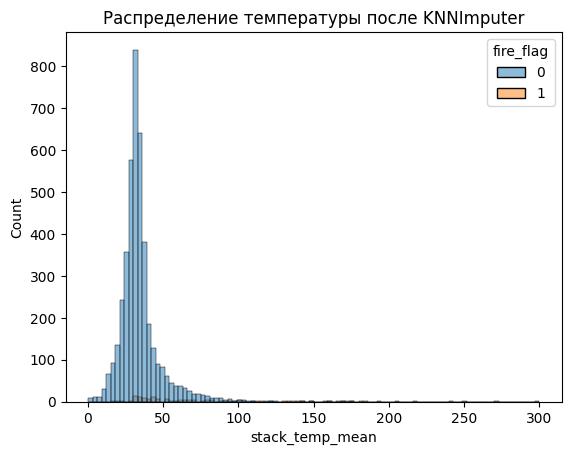

In [ ]:
sns.histplot(data=time_series, x='stack_temp_mean', hue='fire_flag', bins=100)
plt.title('Распределение температуры после KNNImputer')
plt.show()

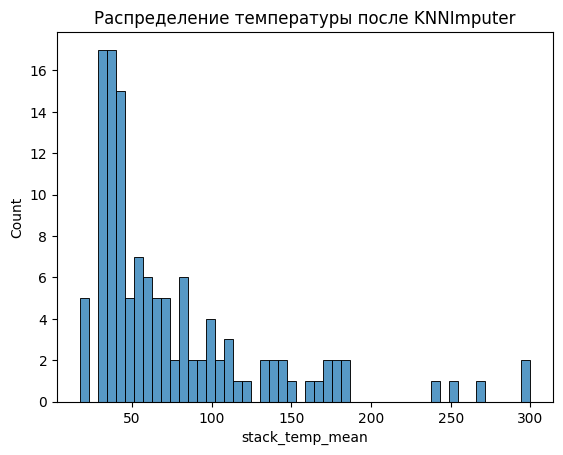

In [ ]:
sns.histplot(data=time_series[time_series['fire_flag']==1], x='stack_temp_mean', bins=50)
plt.title('Распределение температуры после KNNImputer')
plt.show()

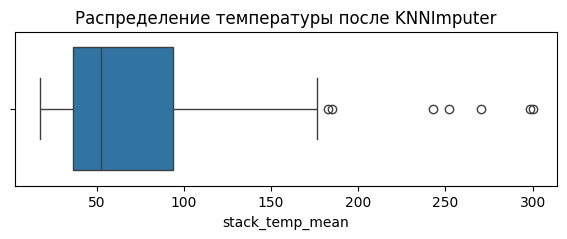

In [ ]:
plt.figure(figsize=(7,2))
sns.boxplot(data=time_series[time_series['fire_flag']==1], x='stack_temp_mean', )
plt.title('Распределение температуры после KNNImputer')
plt.show()

In [ ]:
time_series.to_csv('/content/drive/MyDrive/data_charcoal/time_series_for_fitting.csv')

# Агрегация 2 (НЕ РАБОЧИЙ ВАРИАНТ)

In [ ]:
suppl_depot6_checked = pd.read_csv('/content/drive/MyDrive/data_charcoal/suppl_depot6_checked.csv', index_col='Unnamed: 0', )

In [ ]:
suppl_depot6_checked.info()

In [ ]:
suppl_depot6_checked['load_to_depot_date'] = pd.to_datetime(suppl_depot6_checked['load_to_depot_date'], format='%Y-%m-%d')

In [ ]:
suppl_depot6_checked.head()

In [ ]:
fires_df.info()

In [ ]:
sns.lineplot(data = suppl_depot6_checked, x='load_to_depot_date', y='accum_mass', hue='stack', palette="viridis")

In [ ]:
suppl = suppl_depot6_checked.copy()

suppl["load_to_ship_date"] = pd.to_datetime(suppl["load_to_ship_date"])
suppl["load_to_depot_date"] = pd.to_datetime(suppl["load_to_depot_date"])

suppl["fire_date"] = pd.NaT
suppl["output_fire"] = 0.0

sup_pairs = suppl[["depot", "stack"]].drop_duplicates()
fires_sub = fires_df.merge(sup_pairs, on=["depot", "stack"], how="inner")

fires_sub = fires_sub.sort_values(["depot", "stack", "start_date"]).copy()
fires_sub["fire_date"] = fires_sub["start_date"].dt.normalize()

for _, f in fires_sub.iterrows():
    depot = f["depot"]
    stack = f["stack"]
    fire_date = f["fire_date"]
    loss = f["act_weight"]

    stack_rows = (
        suppl[(suppl["depot"] == depot) & (suppl["stack"] == stack)]
        .sort_values("load_to_ship_date")
    )

    after_fire = stack_rows[stack_rows["load_to_ship_date"] >= fire_date]

    if not after_fire.empty:
        idx = after_fire["load_to_ship_date"].idxmin()
    else:
        idx = stack_rows["load_to_ship_date"].idxmax()

    suppl.loc[idx, "fire_date"] = fire_date
    suppl.loc[idx, "output_fire"] += loss

suppl['delta_weight'] = suppl['delta_weight'] - suppl['output_fire']

suppl.info()
suppl.head()

In [ ]:
sns.lineplot(data = suppl, x='load_to_depot_date', y='output_fire', hue='stack', palette="viridis")


In [ ]:
suppl['accum_mass'] = suppl.groupby('stack')['delta_weight'].cumsum().abs()
sns.lineplot(
    data=suppl,
    x="load_to_depot_date",
    y="accum_mass",
    hue="stack",
    palette="viridis"
)
plt.title('Накопленные массы на штабелях, склад 6')
plt.xlabel('Дата погрузки на склад')
plt.show()

In [ ]:
suppl['fire_date'].notna().sum()

In [ ]:
suppl['stack'].unique()